# Ecological models: relevant?
## NIOZ Master Thesis Project

This Jupyter Notebook contains a detailed description and workflow to train two machine learning models for my thesis. Every section is denoted with a second level heading to keep track of my experiments. First the data from the EBT Tool is imported - a deterministic population model resembling a tri-trophic system in the Baltic Sea (Van Leeuwen et al., 2008). This data is used to train two machine learning models (TCDF and PCMCI respectively) to infer (ecological) causal relations. Both are convolutional machine learning models, and able to handle non-stationary temporal data. 

Author: R. Draaijer

## Enabling notebook to be run on any device

In [1]:
import os

# Create universally (i.e. across various operating systems) recognized paths

notebook_path = os.path.abspath('MSc Thesis 1.ipynb')                  # Jupyter notebook path
TCDF_path = os.path.join(os.path.dirname(notebook_path), 'TCDF')       # TCDF folder path
TCDFdata_path = os.path.join(TCDF_path, 'data')                        # TCDF/data folder path
EBT_path = os.path.join(os.path.dirname(notebook_path), 'EBT Data')    # EBT folder path
DefaultCod_path = os.path.join(EBT_path, 'Modified Default Cod')       # EBT/Modified Default Cod folder path
Cod_path = os.path.join(DefaultCod_path, 'Modified Default.out')       # EBT/Modified Default Cod/Modified Default.out file path

## EBT Tool

### Import EBT Tool Data with NumPy
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files

In [2]:
# Get path for EBT data (.txt file)
path = Cod_path

# Check first entries of data
with open(path) as Default_Cod:
    print(Default_Cod.readline())

0.00	0.000000E+00	54.8212970000	0.2682070000	0.9892870000	8.5112130000	9.9553140000	50.0338940000	8.1868890000	0.8092280000	0.8422930000	0.000000E+00	0.000000E+00	0.000000E+00	0.000000E+00	0.000000E+00	56.6028346684	22.6730919259	25.9887468408	0.8307394959	0.1492078213	0.3078741160	9.8384100000	0.000000E+00



In [3]:
# Convert dataset to ndarray
import numpy as np

with open(path) as Default_Cod:
    default_cod = np.loadtxt(Default_Cod)

# Check (dimensions of) array
print(default_cod) 
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool
print(default_cod.dtype)           # Should be float64

[[0.00000000e+00 0.00000000e+00 5.48212970e+01 ... 3.07874116e-01
  9.83841000e+00 0.00000000e+00]
 [1.00000000e+00 2.73972600e-03 5.48213227e+01 ... 3.07874682e-01
  9.83841208e+00 0.00000000e+00]
 [2.00000000e+00 5.47945210e-03 5.48213485e+01 ... 3.07875243e-01
  9.83841413e+00 0.00000000e+00]
 ...
 [3.64980000e+04 9.99945205e+01 6.25598481e+00 ... 2.24811300e-08
  6.26818600e-07 0.00000000e+00]
 [3.64990000e+04 9.99972603e+01 6.25598481e+00 ... 2.24691700e-08
  6.26477700e-07 0.00000000e+00]
 [3.65000000e+04 1.00000000e+02 6.25598481e+00 ... 2.24572100e-08
  6.26137000e-07 0.00000000e+00]]
(36501, 24)
float64


In hindsight the library pandas can be highly useful for loading data, therefore:

### Import EBT Tool Data with pandas
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files*

In [4]:
import pandas as pd

# Get path for EBT data (.txt file)
path = Cod_path

# Define column names (see EBT .c file in output variables section) for multilevel indexing
variables = ['Time', 'Years', 'RS', 'RJ', 'RA', 'SJ', 'SA', 'SB', 'CJ', 'CA', 'CB', 'Fc', 'ΔCJ with Fc', 'ΔCS with Fc',
             'ΔCA with Fc', 'ΔC with Fc', 'ΔSB', 'ΔSJ', 'ΔSA', 'ΔCB', 'ΔCJ', 'ΔCA', 'ΣC', 'Fs']
units = ['[day]', '[year]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]',
         '[g V-1]', '[-]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]',
         '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1]', '[-]']

with open(path) as Default_Cod:
    default_cod = pd.read_csv(Default_Cod, delimiter = '\t', header=None)

# Set column names and index
#columns = pd.MultiIndex.set_codes([[variables, units]], names = ['Output variable', 'Unit'])
default_cod.columns = variables
#default_cod.columns = columns
default_cod = default_cod.set_index('Time')

# Check (dimensions of) array
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool

default_cod.head()

(36501, 23)


,Years,RS,RJ,RA,SJ,SA,SB,CJ,CA,CB,...,ΔCA with Fc,ΔC with Fc,ΔSB,ΔSJ,ΔSA,ΔCB,ΔCJ,ΔCA,ΣC,Fs
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,0.842293,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,0.842294,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,0.842295,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,0.842297,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,0.842298,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0


Text(0.5, 0, 'Time [year]')

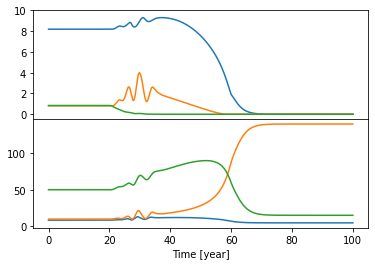

In [5]:
# Visualize default_cod as is visualized by the EBT tool
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Make figure to visualize plots in
fig, axes = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0)

# Select the biomass columns
# Cod biomass
cod_fig = fig.add_subplot(axes[0])
cod_fig.plot(default_cod['Years'], default_cod[['CJ','CA','CB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))


# Sprat biomass
sprat_fig = fig.add_subplot(axes[1])
sprat_fig.plot(default_cod['Years'], default_cod[['SJ','SA','SB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))
sprat_fig.set_xlabel('Time [year]')

## TCDF Demo

This is a short demo for the first machine learning model, to get familiar with the training and testing of data. 

In [6]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# Load data from EBT tool into DataFrame
path = Cod_path
ebt = pd.read_csv(path, delimiter = '\t', header = None)

# Show first 10 rows of dataset
ebt.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1,1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2,2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3,3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4,4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0
5,5.0,0.013699,54.821427,0.268207,0.989287,8.511182,9.955293,50.033827,8.186885,0.809236,...,0.0,0.0,56.602775,22.672921,25.988692,0.830745,0.149187,0.307877,9.838420,0.0
6,6.0,0.016438,54.821453,0.268207,0.989287,8.511175,9.955289,50.033813,8.186884,0.809238,...,0.0,0.0,56.602763,22.672887,25.988681,0.830747,0.149183,0.307877,9.838422,0.0
7,7.0,0.019178,54.821479,0.268207,0.989287,8.511169,9.955284,50.033799,8.186883,0.809240,...,0.0,0.0,56.602751,22.672853,25.988669,0.830748,0.149179,0.307878,9.838424,0.0
8,8.0,0.021918,54.821506,0.268206,0.989287,8.511163,9.955279,50.033786,8.186882,0.809241,...,0.0,0.0,56.602739,22.672819,25.988657,0.830749,0.149175,0.307879,9.838426,0.0
9,9.0,0.024658,54.821533,0.268206,0.989287,8.511157,9.955275,50.033772,8.186881,0.809243,...,0.0,0.0,56.602727,22.672785,25.988645,0.830750,0.149171,0.307879,9.838428,0.0


### Data Cleaning

In [7]:
# Rename columns (see file /Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/Explanation Output Parameters.docx)
labels = ['Time (day)', 'Time (year)',                    # Time labels
          'Rs', 'Rj', 'Ra',                               # Shared resources biomass
          'Sj', 'Sa', 'Sb',                               # Sprat stages biomass
          'Cj', 'Ca', 'Cb',                               # Cod stages biomass
          'Fc',                                           # Fishing imposed on cod
          'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', # Changes in cod biomass when fishing present
          'ΔSb', 'ΔSj', 'ΔSa',                           # Changes in sprat biomass
          'ΔCb', 'ΔCj', 'ΔCa',                           # Changes in cod biomass
          'ΣC',                                           # Sum of cod biomass
          'Fs']                                           # Fishing imposed on sprat
ebt.columns = labels

# Show new column labels
print(ebt.columns)

Index(['Time (day)', 'Time (year)', 'Rs', 'Rj', 'Ra', 'Sj', 'Sa', 'Sb', 'Cj',
       'Ca', 'Cb', 'Fc', 'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', 'ΔSb',
       'ΔSj', 'ΔSa', 'ΔCb', 'ΔCj', 'ΔCa', 'ΣC', 'Fs'],
      dtype='object')


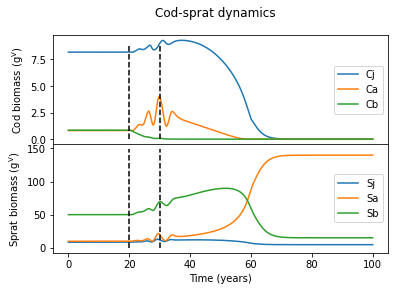

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = ebt[['Cj', 'Ca', 'Cb']]
sprat = ebt[['Sj', 'Sa', 'Sb']]
time = ebt['Time (year)']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center right')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center right')

# Draw vertical line at 20 years and 30 years to visualize data selection
cod_plt.plot([20] * 10, np.arange(0,10), '--k')
sprat_plt.plot([20] * 150, np.arange(0,150), '--k')

cod_plt.plot([30] * 10, np.arange(0,10), '--k')
sprat_plt.plot([30] * 150, np.arange(0,150), '--k')

In the above figure dashed lines represent the data I have selected to carry out a demo of the TCDF machine learning model. For the purpose of this demo I have aditionally selected a low resolution of 30 day timesteps over 100 years. Next I will clean the data for this demo purpose too, with the following characteristics:
> - Data between year 20 and 30 (i.e. 120 datapoints) 
> - Inclusion of the columns representing sprat- and cod stages
> - Inclusion of the shared resources columns

The data needs to be converted into a .csv file with every column representative of a (continuous) timeseries and the header needs explanatory column names (for eventually we will create a temporal causal graph with each node representing a timeseries).

In [9]:
# Select information of datapoints between year 20 and 30
demo_ebt = ebt[(ebt['Time (year)'] >= 20) & (ebt['Time (year)'] <= 30)]

# Select only the necessary biomass columns as timeseries
demo_ebt = demo_ebt[['Rs', 'Rj', 'Ra',
                     'Sj', 'Sa', 'Sb',
                     'Cj', 'Ca', 'Cb',
                     'Fc']]

# Reset index
demo_ebt.reset_index(inplace = True)
demo_ebt.drop('index', axis = 'columns', inplace = True)

# Show first and last five columns of clean dataframe
demo_ebt.head(-5)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000
1,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843532,0.001027
2,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843530,0.002055
3,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184918,0.809398,0.843527,0.003082
4,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184917,0.809396,0.843522,0.004110
...,...,...,...,...,...,...,...,...,...,...
3641,25.940005,0.290546,0.969713,11.992235,20.165629,69.478724,8.987906,3.973822,0.076795,3.740753
3642,25.957505,0.290461,0.969712,11.986605,20.150119,69.483323,8.989210,3.972971,0.076769,3.741781
3643,25.975086,0.290377,0.969711,11.980978,20.134557,69.487854,8.990512,3.972101,0.076743,3.742808
3644,25.992747,0.290292,0.969711,11.975354,20.118942,69.492318,8.991813,3.971212,0.076716,3.743836


### Low Resolution Dataset
Run these cells when performing machine learning model with low res dataset

In [10]:
# Compress dataset to lower resolution (~365 datapoints)
low_demo_ebt = demo_ebt.iloc[::10, :]
low_demo_ebt.reset_index(drop = True, inplace = True)
low_demo_ebt['Time'] = np.linspace(20, 30, 366)

# Check format of low resolution dataset
low_demo_ebt

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc,Time
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000,20.000000
1,54.838330,0.268238,0.989280,8.510207,9.956563,50.013248,8.184903,0.809379,0.843464,0.010274,20.027397
2,54.838303,0.268239,0.989280,8.510224,9.956576,50.013281,8.184851,0.809317,0.843258,0.020548,20.054795
3,54.838202,0.268241,0.989282,8.510272,9.956614,50.013370,8.184762,0.809213,0.842916,0.030822,20.082192
4,54.837966,0.268244,0.989284,8.510369,9.956694,50.013544,8.184634,0.809070,0.842440,0.041096,20.109589
...,...,...,...,...,...,...,...,...,...,...,...
361,25.440350,0.293186,0.969794,12.167928,20.617554,69.302405,8.946928,3.990450,0.077369,3.708904,29.890411
362,25.592090,0.292331,0.969755,12.111058,20.478283,69.366466,8.960258,3.987189,0.077231,3.719178,29.917808
363,25.753000,0.291479,0.969728,12.054347,20.332621,69.423668,8.973486,3.981907,0.077048,3.729452,29.945205
364,25.922587,0.290631,0.969713,11.997868,20.181086,69.474057,8.986601,3.974654,0.076820,3.739726,29.972603


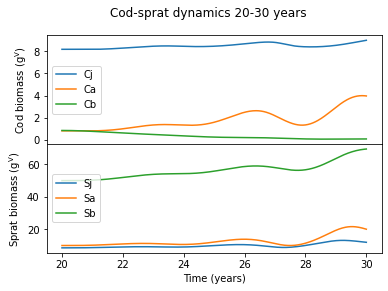

In [11]:
# Visualize data from lower resolution dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = low_demo_ebt[['Cj', 'Ca', 'Cb']]
sprat = low_demo_ebt[['Sj', 'Sa', 'Sb']]
time = low_demo_ebt['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
low_demo_ebt.drop(['Time'], axis = 1, inplace = True)

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(low_demo_ebt)

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
demo_ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
demo_ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.165405,0.984417,0.000000e+00,0.000123,0.000000e+00,0.011209,0.002429,1.000000,0.000000
1,1.000000,0.165409,0.984422,5.055820e-07,0.000123,2.369050e-07,0.011189,0.002423,0.999912,0.002740
2,0.999999,0.165428,0.984450,4.195656e-06,0.000124,1.907222e-06,0.011126,0.002403,0.999650,0.005479
3,0.999996,0.165470,0.984512,1.458505e-05,0.000128,6.462716e-06,0.011018,0.002371,0.999214,0.008219
4,0.999988,0.165540,0.984610,3.547577e-05,0.000135,1.537952e-05,0.010862,0.002326,0.998606,0.010959
...,...,...,...,...,...,...,...,...,...,...
351,0.000394,0.834836,0.058395,9.102274e-01,0.994137,9.365301e-01,0.771108,0.972165,0.021485,0.961644
352,0.001315,0.818991,0.050148,8.991905e-01,0.990120,9.433765e-01,0.787616,0.978138,0.021878,0.964384
353,0.002741,0.802812,0.042518,8.878420e-01,0.985123,9.498690e-01,0.804167,0.983378,0.022219,0.967123
354,0.004649,0.786351,0.035513,8.762325e-01,0.979184,9.560058e-01,0.820744,0.987887,0.022505,0.969863


### High Resolution Dataset
Run these cells when performing machine learning model with high res dataset

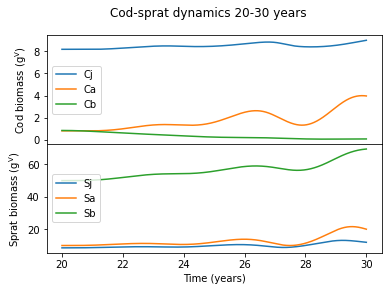

In [13]:
# Visualize data from lower resolution dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = demo_ebt[['Cj', 'Ca', 'Cb']]
sprat = demo_ebt[['Sj', 'Sa', 'Sb']]
demo_ebt['Time'] = np.linspace(20, 30, 3651)
time = demo_ebt['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
demo_ebt.drop(['Time'], axis = 1, inplace = True)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(demo_ebt)

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
demo_ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
demo_ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.165474,0.984412,0.000000e+00,0.000190,0.000000e+00,0.011218,0.002431,1.000000,0.000000
1,1.000000,0.165474,0.984412,3.460767e-10,0.000190,1.384297e-10,0.011218,0.002431,0.999999,0.000274
2,1.000000,0.165474,0.984412,3.655434e-09,0.000190,1.697049e-09,0.011217,0.002431,0.999996,0.000548
3,1.000000,0.165474,0.984412,1.286972e-08,0.000190,6.111426e-09,0.011216,0.002430,0.999992,0.000822
4,1.000000,0.165474,0.984413,3.110363e-08,0.000190,1.480175e-08,0.011215,0.002430,0.999986,0.001096
...,...,...,...,...,...,...,...,...,...,...
3636,0.043359,0.622474,0.000372,7.592537e-01,0.882482,9.967713e-01,0.977885,0.995656,0.022334,0.996164
3637,0.043923,0.620770,0.000308,7.580328e-01,0.881175,9.970244e-01,0.979474,0.995420,0.022304,0.996438
3638,0.044489,0.619066,0.000250,7.568126e-01,0.879863,9.972741e-01,0.981062,0.995177,0.022273,0.996712
3639,0.045059,0.617363,0.000198,7.555930e-01,0.878546,9.975202e-01,0.982649,0.994929,0.022242,0.996986


### Continue here after selection of dataset resolution

In [15]:
# Define function for visualisation of scaled data 

def visualise_scaled(ebt_scaled, years):
    # Select data to be visualized
    cod = ebt_scaled[['Cj', 'Ca', 'Cb']]
    sprat = ebt_scaled[['Sj', 'Sa', 'Sb']]
    resource = ebt_scaled[['Rj', 'Rs', 'Ra']]
    ebt_scaled['Time'] = np.linspace(years[0], years[1], len(ebt_scaled))
    time = ebt_scaled['Time']

    # Set subplot figure defaults
    fig, [cod_plt, sprat_plt, resource_plt] = plt.subplots(3, 1, sharex = True)
    fig.subplots_adjust(hspace = 0)
    fig.suptitle('Cod-sprat-resource dynamics {start}-{stop} years (scaled min-max)'.format(start=years[0],stop=years[1]))

    # Set labels for shared x-axis and individual y-axes
    cod_plt.set(ylabel = 'Cod biomass')
    sprat_plt.set(ylabel = 'Sprat biomass')
    resource_plt.set(ylabel = 'Resource biomass')
    plt.xlabel('Time (years)')

    # Visualize data
    cod_plt.plot(time, cod)
    sprat_plt.plot(time, sprat)
    resource_plt.plot(time, resource)

    # Add legends
    cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
    sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')
    resource_plt.legend(['Rj', 'Rs', 'Ra'], loc = 'center left')

    # Remove Time column
    ebt_scaled.drop(['Time'], axis = 1, inplace = True)

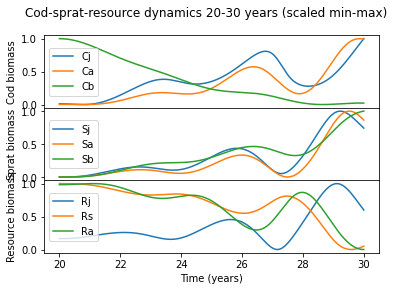

In [16]:
# Visualize scaled data 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Plot scaled data 
visualise_scaled(demo_ebt_scaled, [20,30])

In [17]:
# Create file path for new file
DemoEBTScaled_path = os.path.join(TCDFdata_path, 'EBT_demo_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
demo_ebt_scaled.to_csv(DemoEBTScaled_path, index = False)

For implementation of the first machine model (i.e. TCDF) we have to create a reference to the 'groundtruth' of the model. This makes it possible to compare the found relations by the model to the true relations we have defined in the dataset.

The groundtruth file needs to be .csv file, have no heading and contains three columns. The first column consists of the index of the cause (corresponds to the columnnumber in the EBT_demo_dataset.csv file), index of effect (idem dito), and time delay between index and cause.

For the corresponding causes and effects see the paper by A. van Leeuwen et al. (2008).

In [18]:
# Create list of lists for the rows to the groundtruth.csv file
groundtruth_rows = [[9, 7, 0],  # Fc - Ca
                    [9, 8, 0],  # Fc - Cb
                    [6, 1, 0],  # Cj - Rj
                    [6, 3, 0],  # Cj - Sj
                    [7, 3, 0],  # Ca - Sj
                    [7, 4, 0],  # Ca - Sa
                    [7, 5, 0],  # Ca - Sb
                    [8, 3, 0],  # Cb - Sj
                    [8, 4, 0],  # Cb - Sa
                    [8, 5, 0],  # Cb - Sb
                    [8, 2, 0],  # Cb - Ra
                    [3, 0, 0],  # Sj - Rs
                    [4, 0, 0],  # Sa - Rs
                    [5, 0, 0]]  # Sb - Rs

# Convert list into DataFrame
groundtruth = pd.DataFrame(groundtruth_rows)

# Create file path for new file
DemoEBTGroundtruth_path = os.path.join(TCDFdata_path, 'EBT_demo_groundtruth.csv')

# Write DataFrame to .csv
groundtruth.to_csv(DemoEBTGroundtruth_path, index = False, header = False)


Performing the TCDF requires a different directory (where the TCDF is located). Check if the current directory is set at `'/.../TCDF'`.

In [19]:
# Define needed directory
directory = TCDF_path

# Check current working directory
current_directory = os.getcwd()

# Change working directory to perform TCDF
if current_directory != directory:
    os.chdir(TCDF_path)

# Check new current working directory
os.getcwd()

'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/GitHub/thesis/TCDF'

This part shows the functionality of TCDF.

See the corresponding paper for more detail: ["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19).

In [20]:
# Install conda- and pip packages in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} git
!{sys.executable} -m pip install torchvision

Solving environment: done

# All requested packages already installed.



# TCDF

These next code cells perform the analysis of the (demo) dataset with the TCDF. In the utils.py file you are able to adjust parameters for adaptive learning rate and early stopping. These parameters include type of optimizer (specified in runTCDF.py arguments), number of epochs before adapting learning rate, minimum learning rate, and size of decreasing learning rate factor. For early stopping two parameters are given, the number of epochs before stopping when loss is not improving and the minimum difference in loss improvement.

In [21]:
# Show all argument options

%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])
                  [--lr_scheduler] [--early_stopping]

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_

<Figure size 432x288 with 0 Axes>

### Function for plotting

In [22]:
# This function is to be used to plot the model's loss or accuracy (i.e. performance) after running 
def plot_performance(losses_or_accuracy):
    """Plots the losses for each trained variable for the TCDF model.
    Takes a dictionary with either losses or accuracy for each variable as input"""
    # Preallocate plots in subplots
    fig, axs = plt.subplots(3, 3, sharex = True)
    for ax in axs.flat:
        ax.set(xlabel='Epochs', ylabel='Performance measure')

    # Iterate over each key in dictionary
    keys = list(losses_or_accuracy.keys())
    
    # Plot every variable in different subplot
    axs[0, 0].plot(np.arange(len(losses_or_accuracy[keys[0]])), losses_or_accuracy[keys[0]])
    axs[0, 0].set_title('Performance Rs')
    axs[0, 1].plot(np.arange(len(losses_or_accuracy[keys[1]])), losses_or_accuracy[keys[1]])
    axs[0, 1].set_title('Performance Rj')
    axs[0, 2].plot(np.arange(len(losses_or_accuracy[keys[2]])), losses_or_accuracy[keys[2]])
    axs[0, 2].set_title('Performance Ra')
    axs[1, 0].plot(np.arange(len(losses_or_accuracy[keys[3]])), losses_or_accuracy[keys[3]])
    axs[1, 0].set_title('Performance Sj')
    axs[1, 1].plot(np.arange(len(losses_or_accuracy[keys[4]])), losses_or_accuracy[keys[4]])
    axs[1, 1].set_title('Performance Sa')
    axs[1, 2].plot(np.arange(len(losses_or_accuracy[keys[5]])), losses_or_accuracy[keys[5]])
    axs[1, 2].set_title('Performance Sb')
    axs[2, 0].plot(np.arange(len(losses_or_accuracy[keys[6]])), losses_or_accuracy[keys[6]])
    axs[2, 0].set_title('Performance Cj')
    axs[2, 1].plot(np.arange(len(losses_or_accuracy[keys[7]])), losses_or_accuracy[keys[7]])
    axs[2, 1].set_title('Performance Ca')
    axs[2, 2].plot(np.arange(len(losses_or_accuracy[keys[8]])), losses_or_accuracy[keys[8]])
    axs[2, 2].set_title('Performance Cb')


## TCDF Training

In this section I will tweak (hyper)parameters and save the best outcomes thus far. After implementation of a learning rate scheduler and early stopping to help the process of training the model (see the ~.py files in the TCDF folder, any adjustments are highlighted by '# Adjusted implementation by Draaijer, R.'). Besides, I have also implemented some extra code to save predictive accuracy of the model to plot the performance of the model after the run. Each run is accompanied by two plots (losses and accuracy) to keep track of training the model. 

### TCDF with EBT demo data
#### TCDF: first run

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.315483
Epoch    32: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.002285
INFO: Early stopping at epoch 100
Potential causes:  [4, 2]
Validated causes:  [4]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.088744
Epoch    34: reducing learning rate of group 0 to 1.0000e-02.
Epoch    45: reducing learning rate of group 0 to 1.0000e-03.
Epoch    56: reducing learning rate of group 0 to 1.00

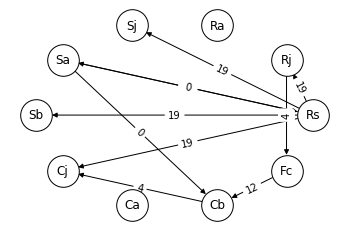

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline

# Run TCDF with the selected demo dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot

#### TCDF: second run (1 extra hidden layer)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.944516
Epoch    32: reducing learning rate of group 0 to 1.0000e-02.
Epoch    43: reducing learning rate of group 0 to 1.0000e-03.
Epoch    54: reducing learning rate of group 0 to 1.0000e-04.
Epoch    65: reducing learning rate of group 0 to 1.0000e-05.
Epoch    76: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 100 [20%] 	Loss: 0.004022
INFO: Early stopping at epoch 100
Potential causes:  [4]
Validated causes:  [4]

 Analysis started for target:  Rj
INFO: Initializing learning rate schedule

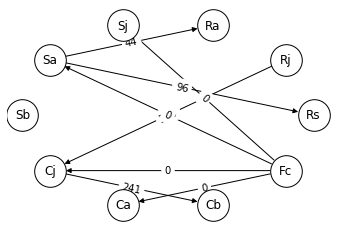

<Figure size 432x288 with 0 Axes>

In [24]:
%matplotlib inline

# Run TCDF with the selected demo dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_demo_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 1.271688
Epoch    32: reducing learning rate of group 0 to 1.0000e-02.
Epoch    43: reducing learning rate of group 0 to 1.0000e-03.
Epoch    54: reducing learning rate of group 0 to 1.0000e-04.
Epoch    65: reducing learning rate of group 0 to 1.0000e-05.
Epoch    76: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 100 [20%] 	Loss: 0.005979
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.215972
Epoch    24: reducing learning rate of group 0 to 1.0000e-02.

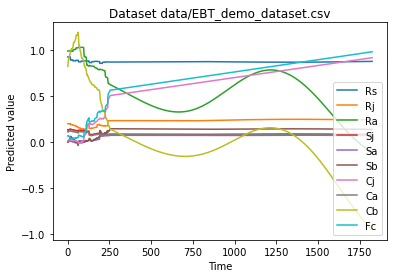

<Figure size 432x288 with 0 Axes>

In [25]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_demo_dataset.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot

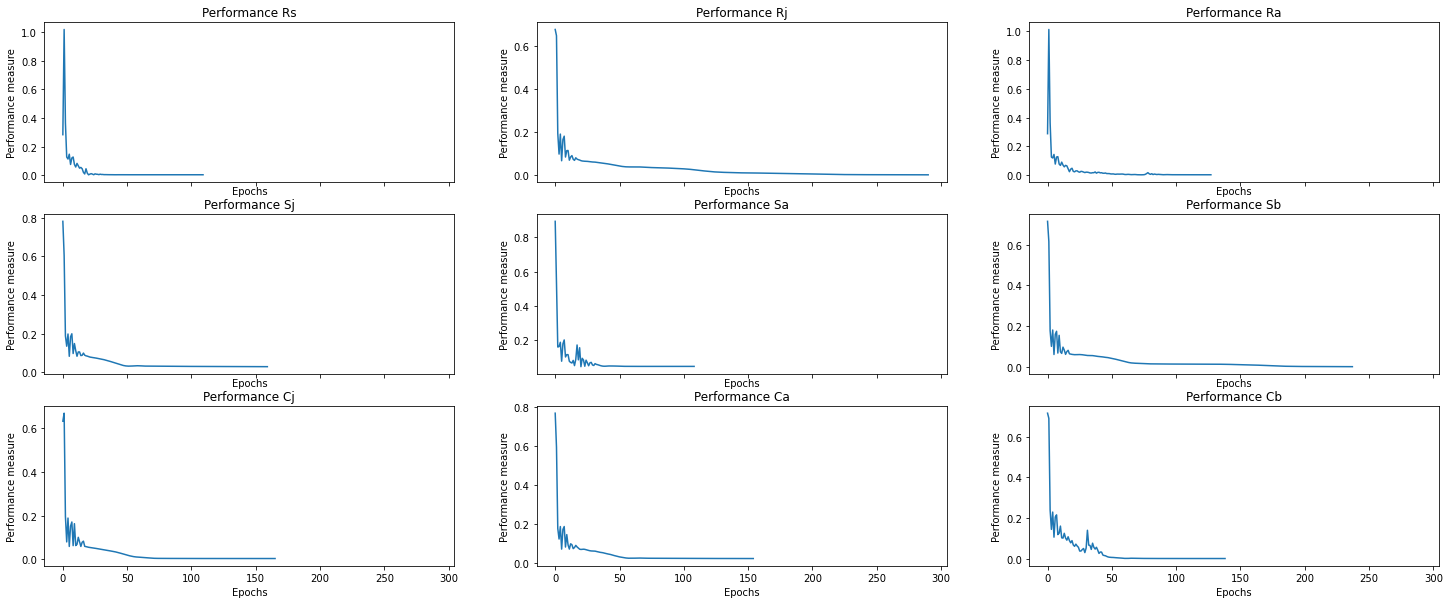

In [26]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

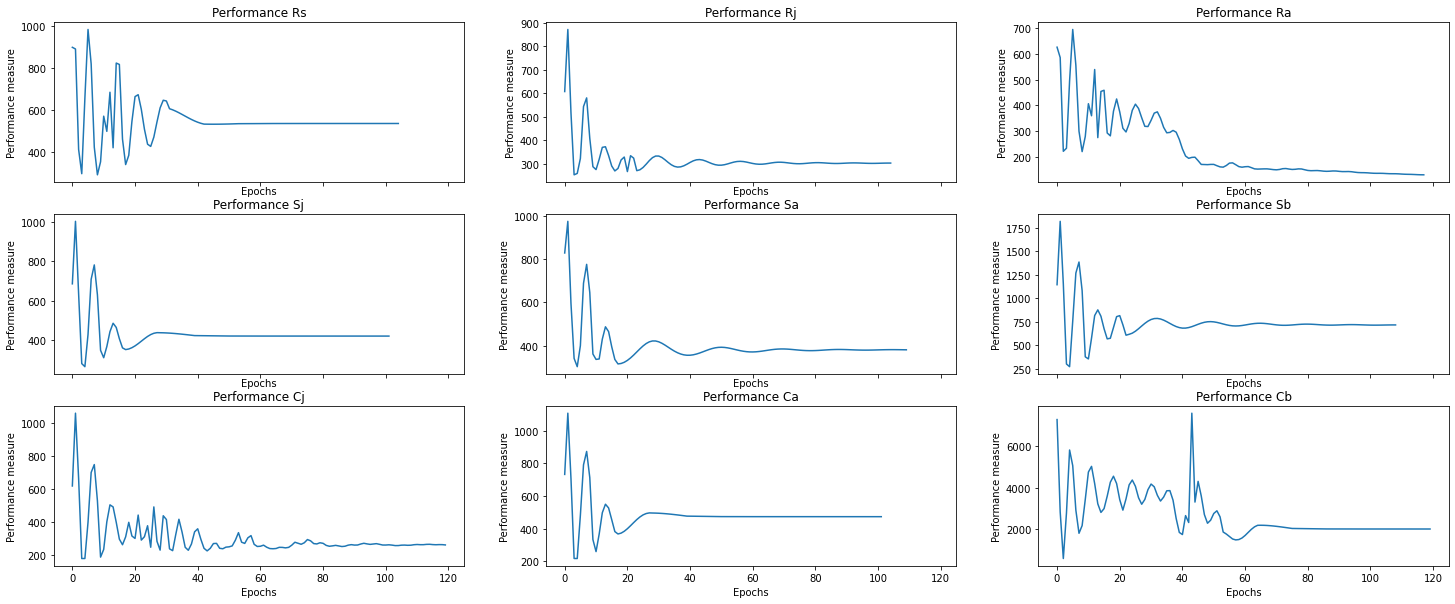

In [27]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF: third run (different seed)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=True, seed=1111, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.493696
INFO: Early stopping at epoch 100
Potential causes:  [5, 8, 6, 3, 2]
Validated causes:  [5]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.160939
Epoch    18: reducing learning rate of group 0 to 1.0000e-02.
INFO: Early stopping at epoch 100
Potential causes:  [7, 8, 6]
Validated causes:  [7, 8, 6]

 Analysis started for target:  Ra
INFO: Initializing learning rate scheduler
INFO: Initializing early stoppin

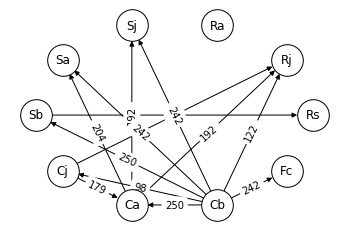

<Figure size 432x288 with 0 Axes>

In [28]:
%matplotlib inline

# Run TCDF and evaluate by comparing the results to the ground truth

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 1111 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_demo_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=True, seed=1111, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.710360
Epoch    38: reducing learning rate of group 0 to 1.0000e-02.
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.033598
Epoch    19: reducing learning rate of group 0 to 1.0000e-02.
Epoch    30: reducing learning rate of group 0 to 1.0000e-03.
Epoch    41: reducing learning rate of group 0 to 1.0000e-04.
Epoch    52: reducing learning rate of group 0 to 1.0000e-05.
Epoch    63: reducing learning rate of group 0 to 1.0000e-06.
INFO: Early stopping at epoch 10

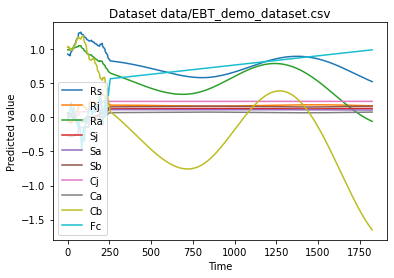

<Figure size 432x288 with 0 Axes>

In [29]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_demo_dataset.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --dilation_coefficient 4 --kernel_size 4 --seed 1111 --plot

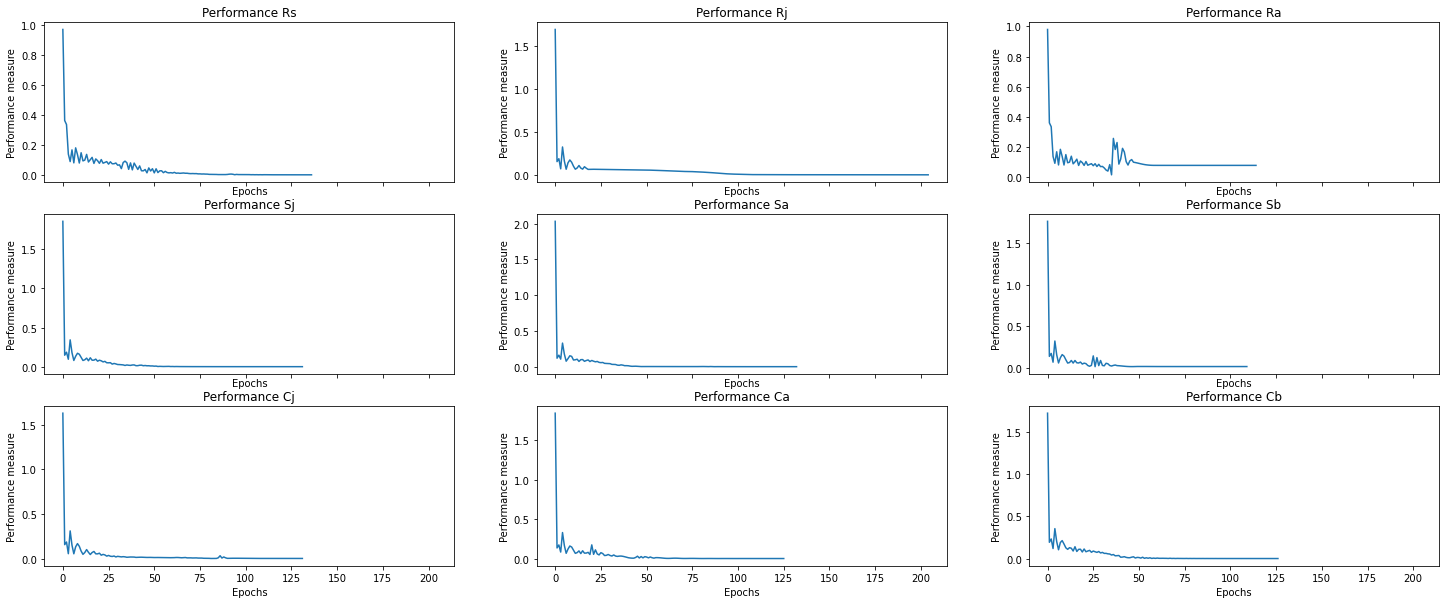

In [30]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

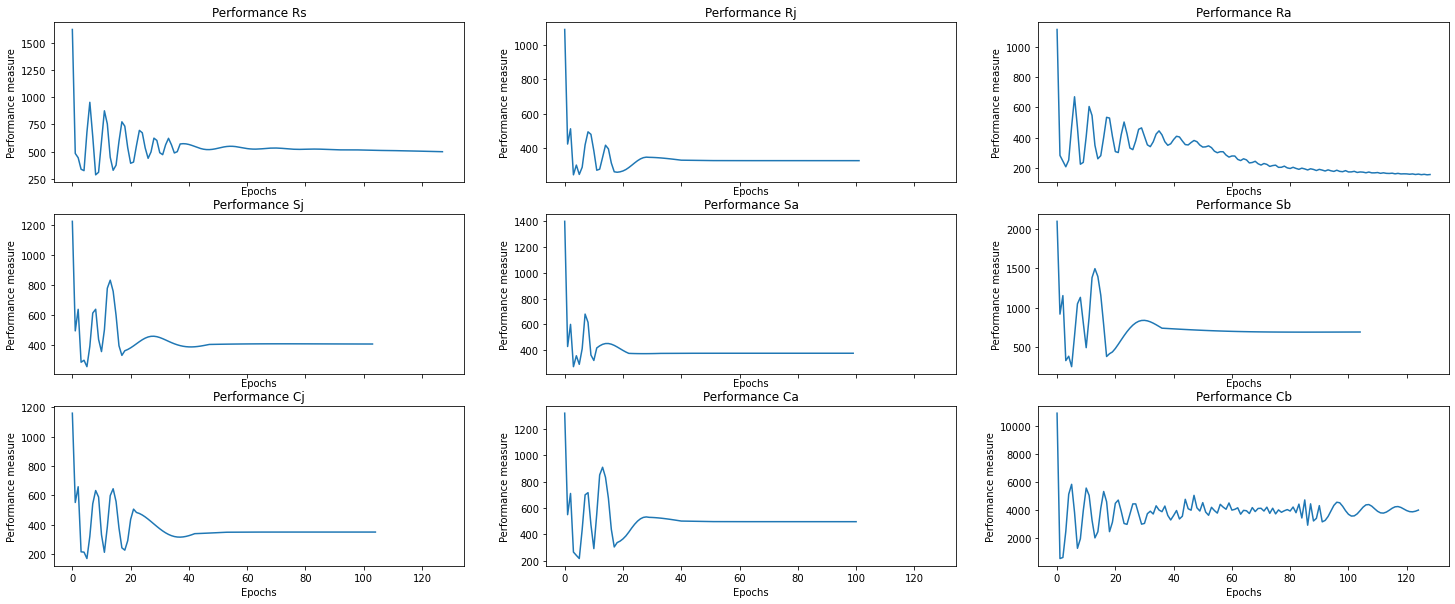

In [31]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF: fourth run (different seed)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=True, seed=25942, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.811492
Epoch    14: reducing learning rate of group 0 to 1.0000e-02.
Epoch    25: reducing learning rate of group 0 to 1.0000e-03.
Epoch    36: reducing learning rate of group 0 to 1.0000e-04.
Epoch    47: reducing learning rate of group 0 to 1.0000e-05.
Epoch    58: reducing learning rate of group 0 to 1.0000e-06.
INFO: Early stopping at epoch 100
Potential causes:  [4, 5, 7, 9]
Validated causes:  []

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing ear

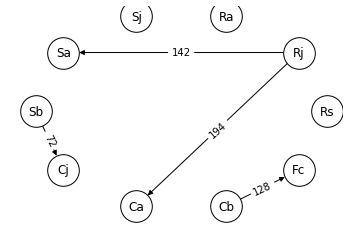

<Figure size 432x288 with 0 Axes>

In [32]:
%matplotlib inline

# Run TCDF and evaluate by comparing the results to the ground truth

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 25942 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_demo_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=True, seed=25942, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 1.110013
Epoch    28: reducing learning rate of group 0 to 1.0000e-02.
Epoch    39: reducing learning rate of group 0 to 1.0000e-03.
Epoch    50: reducing learning rate of group 0 to 1.0000e-04.
Epoch    61: reducing learning rate of group 0 to 1.0000e-05.
Epoch    72: reducing learning rate of group 0 to 1.0000e-06.
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.152828
Epoch    31: reducing learning rate of group 0 to 1.0000e-02.
Epoch    51: reducing learning 

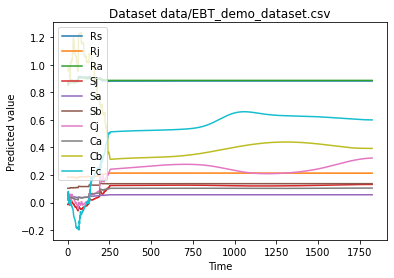

<Figure size 432x288 with 0 Axes>

In [33]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_demo_dataset.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --dilation_coefficient 4 --kernel_size 4 --seed 25942 --plot

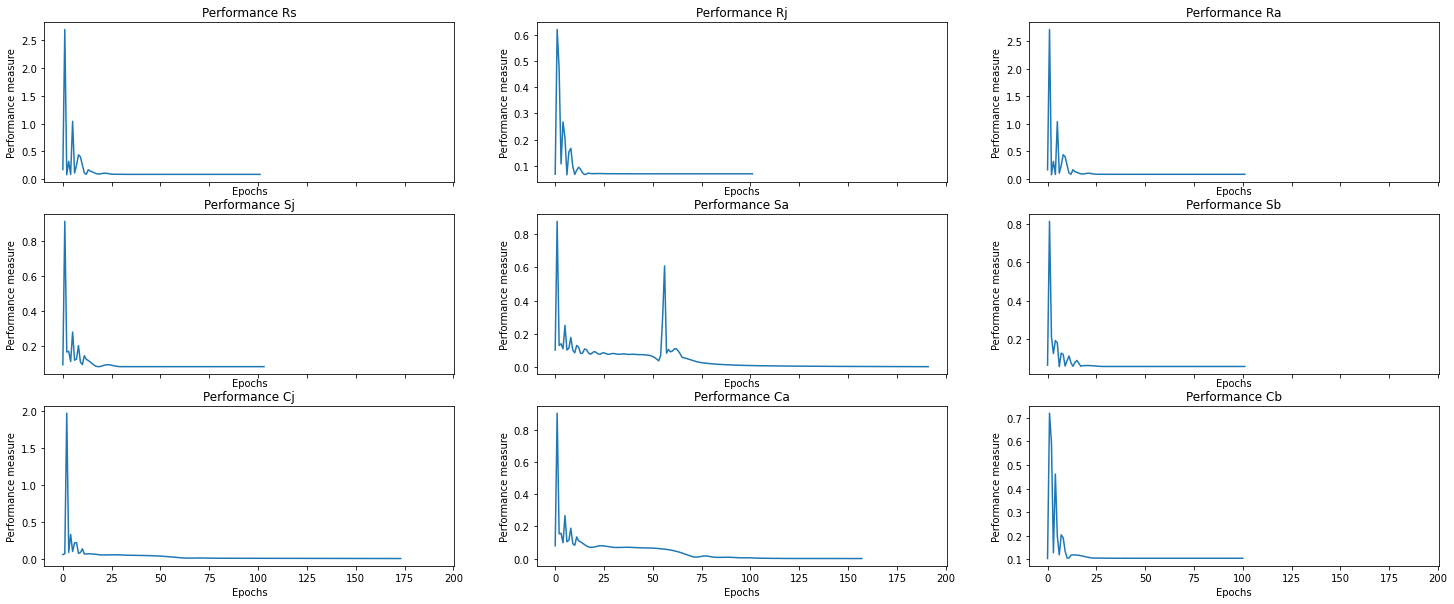

In [34]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

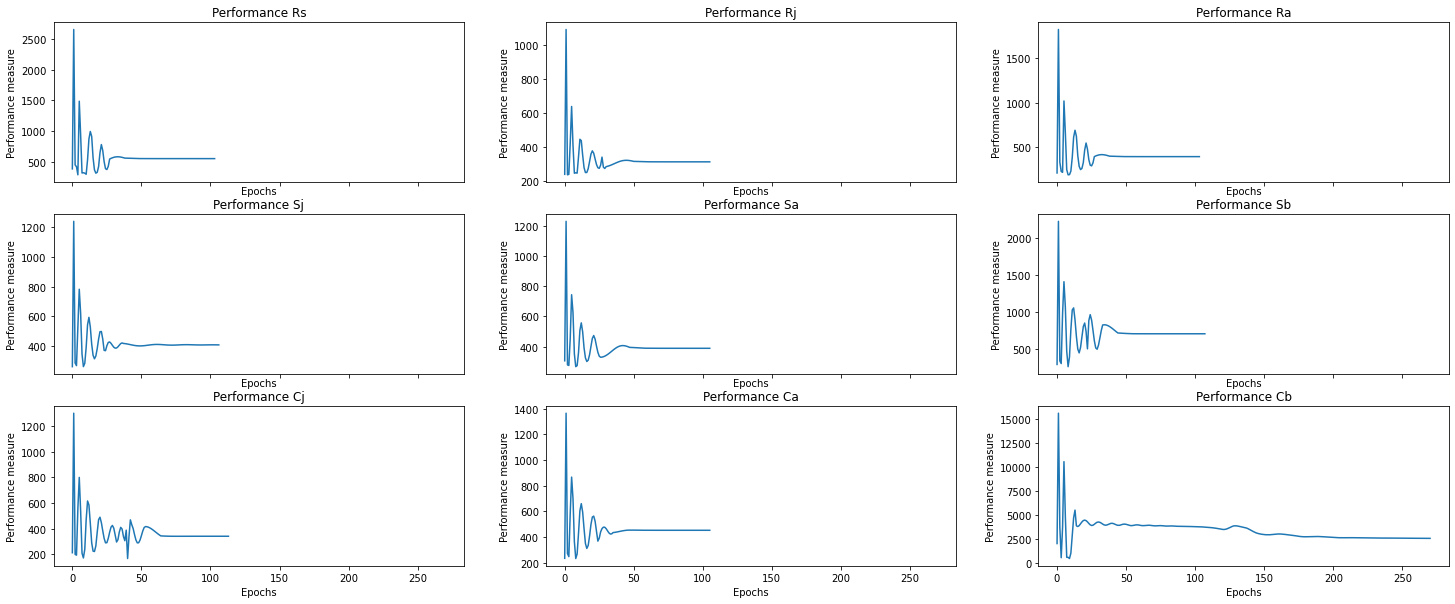

In [35]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

There seems to be big differences in performance and loss when changing the seed, this indicates an unstable pattern and have to find better (hyper)parameters. Or maybe because there is too little data for now?

### TCDF with EBT total dynamics
#### Data cleaning

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Select information of datapoints between year 20 and 70
total_ebt = ebt[(ebt['Time (year)'] >= 20) & (ebt['Time (year)'] <= 70)]

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(total_ebt[['Rs', 'Rj', 'Ra',
                                             'Sj', 'Sa', 'Sb',
                                             'Cj', 'Ca', 'Cb',
                                             'Fc']])

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.00000,0.018127,0.646078,0.441177,0.000017,0.459337,0.879586,2.027708e-01,1.000000,0.000000
1,1.00000,0.018127,0.646078,0.441177,0.000017,0.459337,0.879586,2.027707e-01,0.999999,0.000068
2,1.00000,0.018127,0.646078,0.441177,0.000017,0.459337,0.879586,2.027705e-01,0.999997,0.000137
3,1.00000,0.018127,0.646079,0.441177,0.000017,0.459337,0.879586,2.027703e-01,0.999993,0.000205
4,1.00000,0.018127,0.646079,0.441177,0.000017,0.459337,0.879586,2.027699e-01,0.999987,0.000274
...,...,...,...,...,...,...,...,...,...,...
18236,0.00003,0.999801,0.999999,0.000081,0.999837,0.000260,0.000056,3.579564e-07,0.000043,0.000000
18237,0.00003,0.999815,0.999999,0.000075,0.999849,0.000241,0.000052,3.559397e-07,0.000043,0.000000
18238,0.00003,0.999829,0.999999,0.000069,0.999861,0.000222,0.000048,3.539230e-07,0.000043,0.000000
18239,0.00003,0.999844,0.999999,0.000063,0.999872,0.000204,0.000044,3.519088e-07,0.000043,0.000000


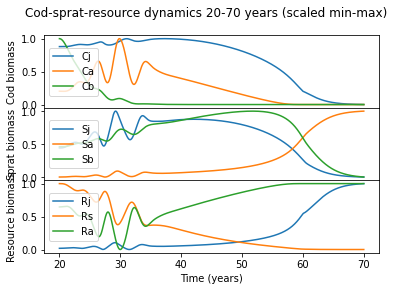

In [37]:
# Visualize scaled data 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Plot scaled data 
visualise_scaled(ebt_scaled, [20,70])

In [38]:
# Create file path for new file
EBTScaled_path = os.path.join(TCDFdata_path, 'EBT_20_70_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
ebt_scaled.to_csv(EBTScaled_path, index = False)

#### TCDF: first run

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_20_70_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, significance=0.95)

 Dataset:  EBT_20_70_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.389573
Epoch    50: reducing learning rate of group 0 to 1.0000e-02.
Epoch    61: reducing learning rate of group 0 to 1.0000e-03.
Epoch    72: reducing learning rate of group 0 to 1.0000e-04.
Epoch    83: reducing learning rate of group 0 to 1.0000e-05.
Epoch    94: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 100 [20%] 	Loss: 0.065416
INFO: Early stopping at epoch 100
Potential causes:  [4, 8]
Validated causes:  [4]

 Analysis started for target:  Rj
INFO: Initializing learning rate sch

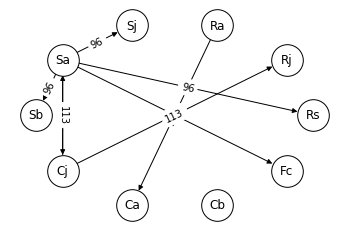

<Figure size 432x288 with 0 Axes>

In [39]:
%matplotlib inline

# Run TCDF with the selected total dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_20_70_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot


Arguments: Namespace(cuda=False, data=['data/EBT_20_70_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.690430
Epoch    48: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.005849
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.084581
Epoch    18: reducing learning rate of group 0 to 1.0000e-02.
Epoch    37: reducing learning rate of group 0 to 1.0000e-03.
Epoch    48: reducing learning rate of group 0 to 1.0000e-04.
Epoch    59: reducing learning rate of group 0 to 1.0000e-05.
Epoch    70: reducing learning rate of group 0 to 1.0000e-06

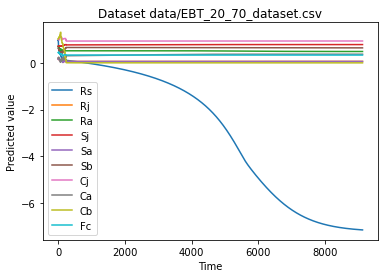

<Figure size 432x288 with 0 Axes>

In [40]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_20_70_dataset.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot

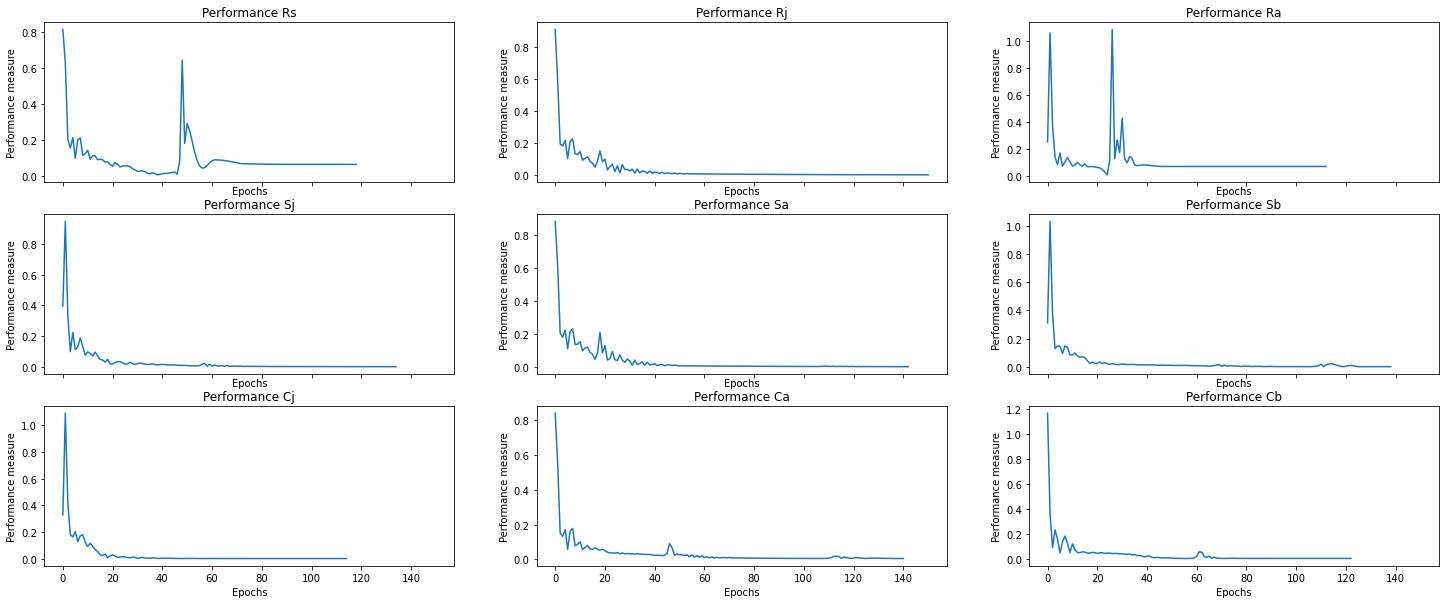

In [41]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

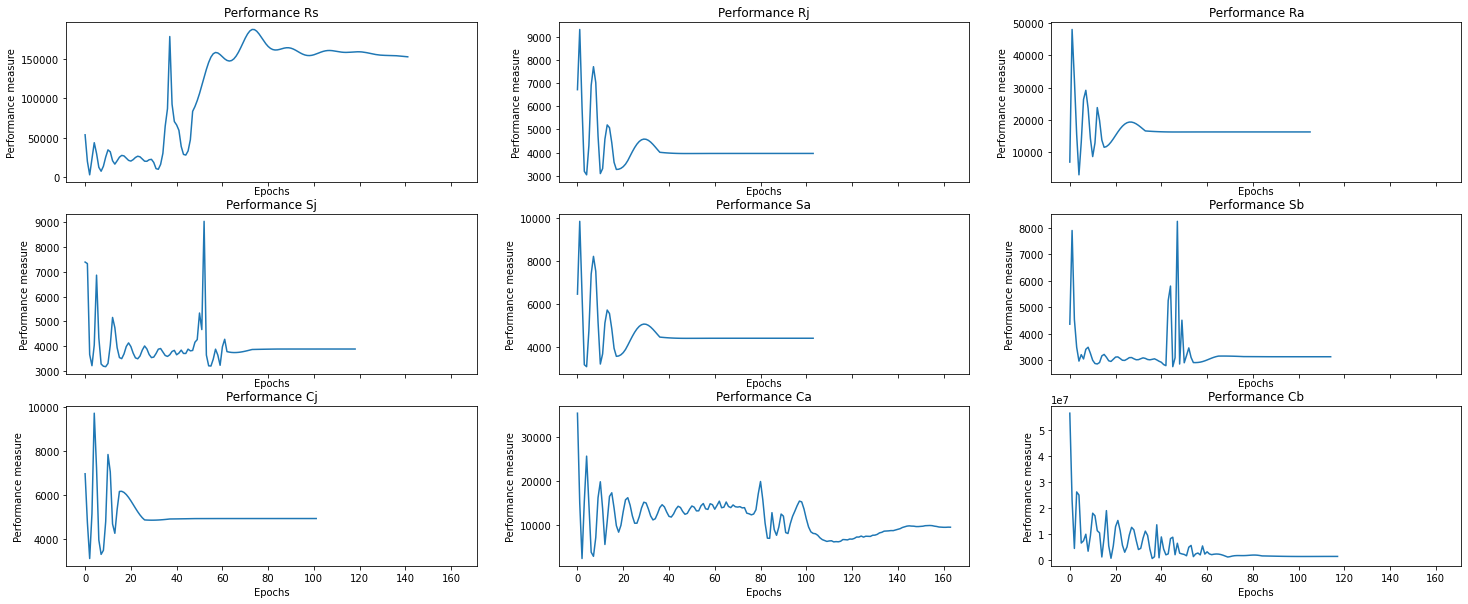

In [42]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF: second run (1 less hidden layer)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_20_70_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, significance=0.95)

 Dataset:  EBT_20_70_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.107181
Epoch    41: reducing learning rate of group 0 to 1.0000e-02.
Epoch    81: reducing learning rate of group 0 to 1.0000e-03.
Epoch    92: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 100 [20%] 	Loss: 0.003188
Epoch   103: reducing learning rate of group 0 to 1.0000e-05.
Epoch   114: reducing learning rate of group 0 to 1.0000e-06.
INFO: Early stopping at epoch 100
Potential causes:  [4]
Validated causes:  [4]

 Analysis started for target:  Rj
INFO: Initializing learning rate schedu

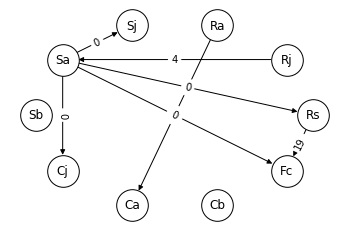

<Figure size 432x288 with 0 Axes>

In [43]:
%matplotlib inline

# Run TCDF with the selected total dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_20_70_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot


Arguments: Namespace(cuda=False, data=['data/EBT_20_70_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=37519, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.649728
Epoch    24: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.028054
Epoch   102: reducing learning rate of group 0 to 1.0000e-03.
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.070026
Epoch    17: reducing learning rate of group 0 to 1.0000e-02.
Epoch    28: reducing learning rate of group 0 to 1.0000e-03.
Epoch    39: reducing learning rate of group 0 to 1.0000e-04.
Epoch    50: reducing learning rate of group 0 to 1.0000e-0

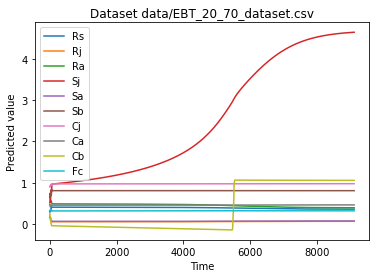

<Figure size 432x288 with 0 Axes>

In [44]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_20_70_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 37519 --plot

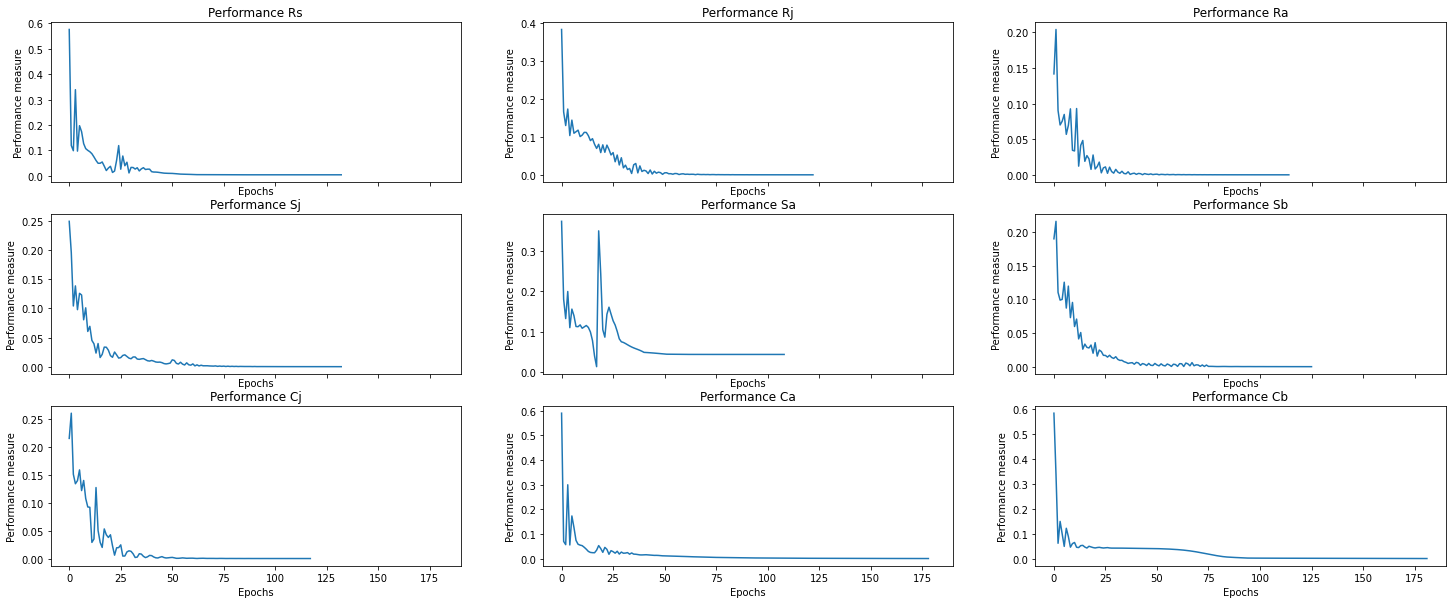

In [45]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

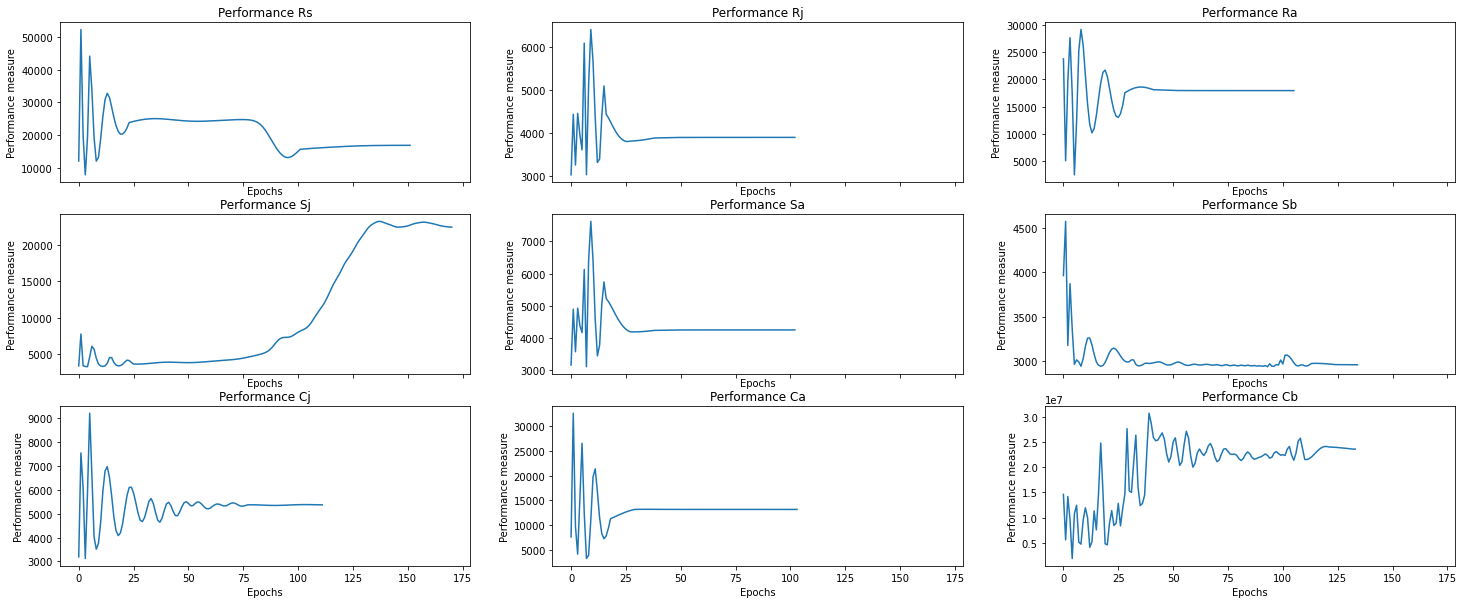

In [46]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF: third run (different seed)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_20_70_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=37519, significance=0.95)

 Dataset:  EBT_20_70_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.361850
Epoch    12: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.008845
INFO: Early stopping at epoch 100
Potential causes:  [6, 1, 5]
Validated causes:  [6, 5]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.321213
Epoch    53: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.001028
INFO: Early stopping at epoch 100
Potential causes:  [6, 8]
Validated caus

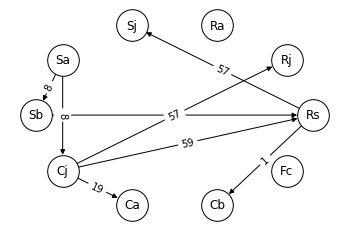

<Figure size 432x288 with 0 Axes>

In [47]:
%matplotlib inline

# Run TCDF with the selected total dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_20_70_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 37519 --plot


Arguments: Namespace(cuda=False, data=['data/EBT_20_70_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=37519, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.649728
Epoch    24: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.028054
Epoch   102: reducing learning rate of group 0 to 1.0000e-03.
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.070026
Epoch    17: reducing learning rate of group 0 to 1.0000e-02.
Epoch    28: reducing learning rate of group 0 to 1.0000e-03.
Epoch    39: reducing learning rate of group 0 to 1.0000e-04.
Epoch    50: reducing learning rate of group 0 to 1.0000e-0

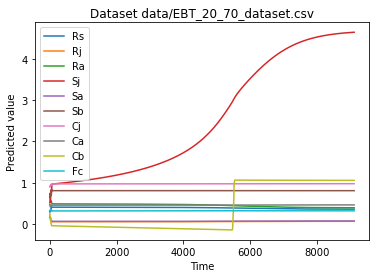

<Figure size 432x288 with 0 Axes>

In [48]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_20_70_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 37519 --plot

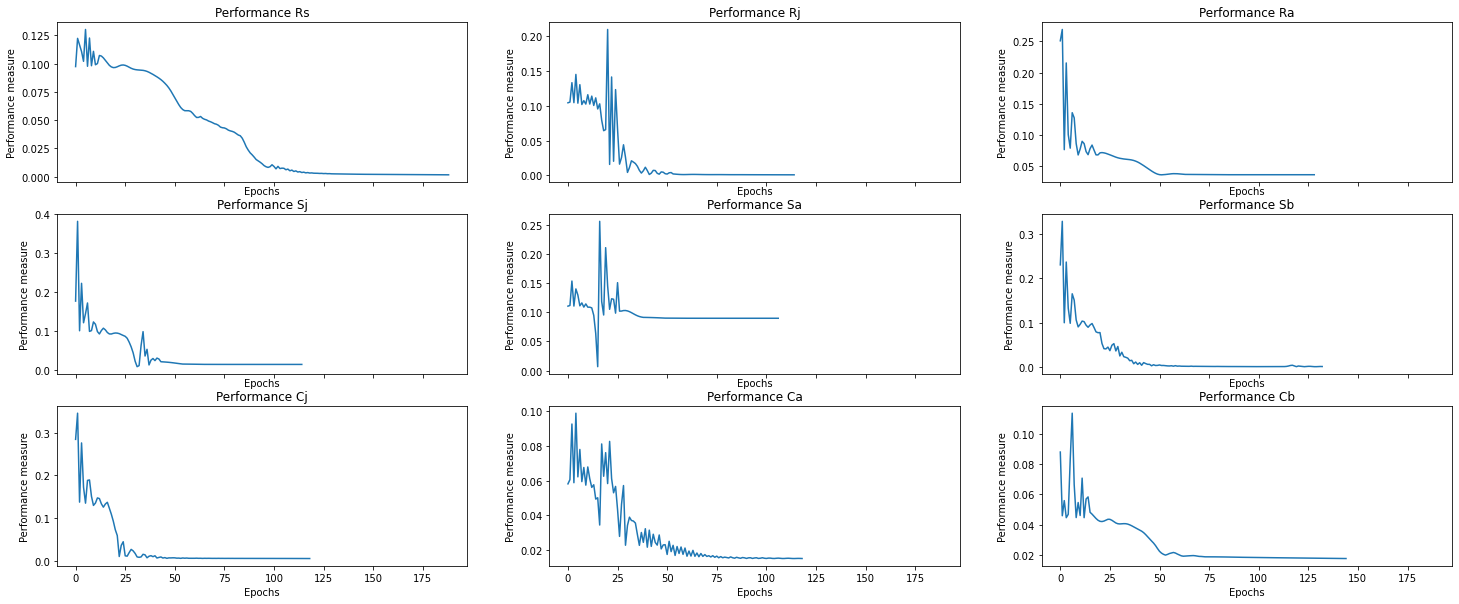

In [49]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

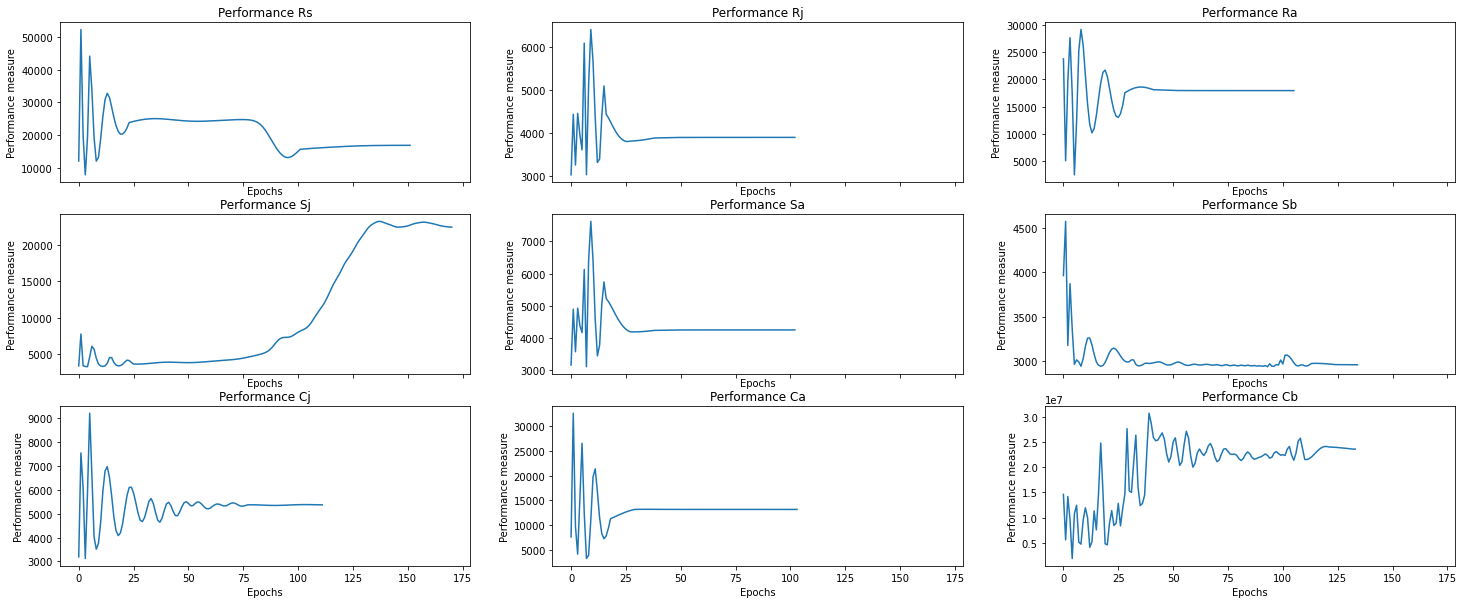

In [50]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

### TCDF with EBT equilibrium dynamics

This data represents the tritrophic biomasses before the introduced fishing pressure on cod. The system first finds it equilibrium and remains stable for ~20 years. Therefore, no relations should be found by the machine learning model.

#### Data cleaning

In [51]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML

# Select information of datapoints for each equilibrium state (i.e. between year 0 and 20 & 70 and 100)
first_eq_ebt = ebt[(ebt['Time (year)'] >= 0) & (ebt['Time (year)'] <= 20)]
second_eq_ebt = ebt[(ebt['Time (year)'] >= 70) & (ebt['Time (year)'] <= 100)]

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled_1 = scaler.fit_transform(first_eq_ebt[['Rs', 'Rj', 'Ra',
                                                  'Sj', 'Sa', 'Sb',
                                                  'Cj', 'Ca', 'Cb',
                                                  'Fc']])
ebt_scaled_2 = scaler.fit_transform(second_eq_ebt[['Rs', 'Rj', 'Ra',
                                                   'Sj', 'Sa', 'Sb',
                                                   'Cj', 'Ca', 'Cb',
                                                   'Fc']])

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
ebt_scaled_1 = pd.DataFrame(ebt_scaled_1, columns = labels)
ebt_scaled_2 = pd.DataFrame(ebt_scaled_2, columns = labels)

# Check the scaled DataFrame
display(ebt_scaled_1.head(-10))
display(ebt_scaled_2.head(-10))

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,0.000000,0.131344,1.000000,1.000000,0.581963,1.000000,1.000000,0.000000,0.000000,0.0
1,0.001472,0.129474,0.999045,0.994492,0.580667,0.999367,0.999595,0.004732,0.000953,0.0
2,0.002950,0.127661,0.997911,0.988974,0.579345,0.998731,0.999181,0.009430,0.001906,0.0
3,0.004435,0.125893,0.996598,0.983445,0.578000,0.998092,0.998761,0.014094,0.002860,0.0
4,0.005927,0.124165,0.995130,0.977906,0.576631,0.997451,0.998333,0.018724,0.003813,0.0
...,...,...,...,...,...,...,...,...,...,...
7286,0.975182,0.974437,0.140148,0.108347,0.980676,0.020865,0.023301,0.478209,0.986265,0.0
7287,0.975182,0.974437,0.140148,0.108346,0.980676,0.020865,0.023301,0.478209,0.986265,0.0
7288,0.975182,0.974437,0.140148,0.108346,0.980675,0.020865,0.023301,0.478210,0.986265,0.0
7289,0.975183,0.974437,0.140136,0.108345,0.980674,0.020865,0.023301,0.478211,0.986265,0.0


,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,0.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.0
1,0.000995,0.001330,0.000812,9.986979e-01,0.001290,9.987132e-01,9.986586e-01,0.999466,0.999572,0.0
2,0.001989,0.002659,0.000812,9.973975e-01,0.002579,9.974280e-01,9.973190e-01,0.998933,0.999143,0.0
3,0.002983,0.003986,0.001623,9.960987e-01,0.003867,9.961444e-01,9.959811e-01,0.998401,0.998715,0.0
4,0.003977,0.005311,0.002435,9.948016e-01,0.005152,9.948624e-01,9.946450e-01,0.997868,0.998287,0.0
...,...,...,...,...,...,...,...,...,...,...
10936,0.999885,1.000000,1.000000,1.019384e-07,1.000000,6.430193e-08,1.270168e-07,0.000022,0.000027,0.0
10937,0.999885,1.000000,1.000000,9.367312e-08,1.000000,5.964099e-08,1.179115e-07,0.000021,0.000025,0.0
10938,0.999885,1.000000,1.000000,8.540783e-08,1.000000,5.507518e-08,1.088099e-07,0.000019,0.000023,0.0
10939,0.999885,1.000000,1.000000,7.989766e-08,1.000000,5.041424e-08,9.971195e-08,0.000017,0.000021,0.0


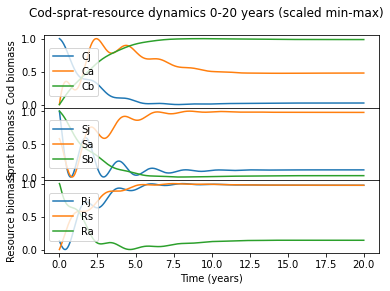

In [52]:
# Visualize scaled data first equilibrium
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

visualise_scaled(ebt_scaled_1, [0,20])

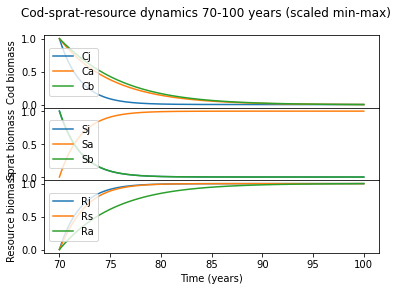

In [53]:
# Visualize scaled data second equilibrium
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

visualise_scaled(ebt_scaled_2, [70,100])

In [54]:
# Create file path for new file
EBTScaled_path = os.path.join(TCDFdata_path, 'EBT_first_eq_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
ebt_scaled_1.to_csv(EBTScaled_path, index = False)

# Create file path for new file
EBTScaled_path = os.path.join(TCDFdata_path, 'EBT_second_eq_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
ebt_scaled_2.to_csv(EBTScaled_path, index = False)

#### TCDF first equilibrium: first run 

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_first_eq_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=37519, significance=0.95)

 Dataset:  EBT_first_eq_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 1.295842
Epoch    14: reducing learning rate of group 0 to 1.0000e-02.
Epoch    25: reducing learning rate of group 0 to 1.0000e-03.
Epoch    36: reducing learning rate of group 0 to 1.0000e-04.
Epoch    47: reducing learning rate of group 0 to 1.0000e-05.
Epoch    58: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 100 [20%] 	Loss: 0.031563
INFO: Early stopping at epoch 100
Potential causes:  [5, 2]
Validated causes:  []

 Analysis started for target:  Rj
INFO: Initializing learning ra

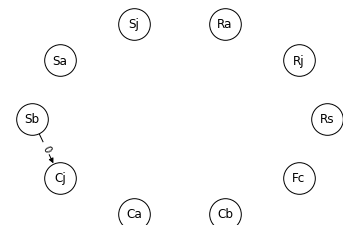

<Figure size 432x288 with 0 Axes>

In [55]:
%matplotlib inline

# Run TCDF with the selected equilibrium dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_first_eq_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 37519 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_first_eq_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=37519, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 1.163000
Epoch: 100 [20%] 	Loss: 0.001230
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 1.122508
Epoch: 100 [20%] 	Loss: 0.006216
INFO: Early stopping at epoch 100

 Analysis started for target:  Ra
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.209044
Epoch    84: reducing learning rate of group 0 to 1.0000e-02.
Epoch    95: reducing learning rate of group 0 to 1.0000e-03.
Epoch: 100 [20%] 	Loss: 0.002864

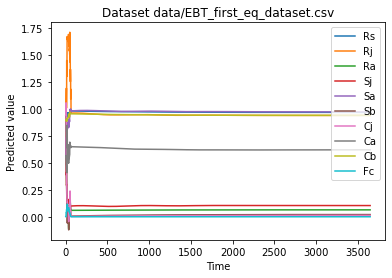

<Figure size 432x288 with 0 Axes>

In [56]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_first_eq_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 37519 --plot

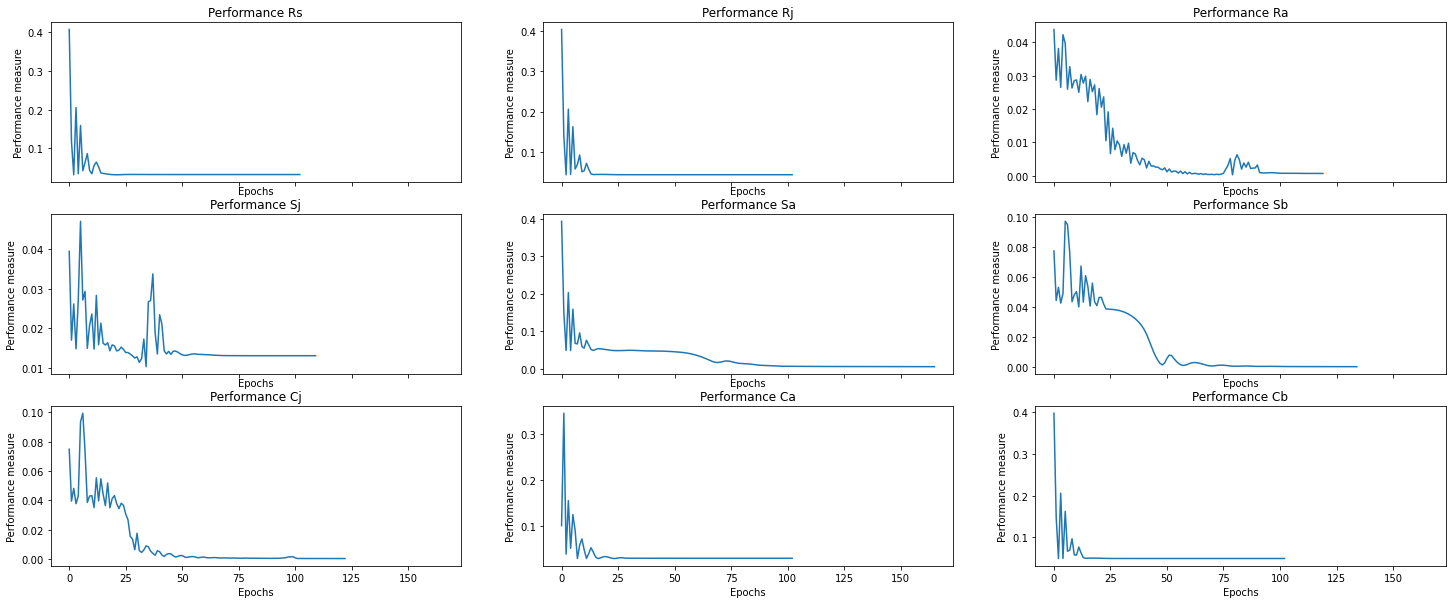

In [57]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

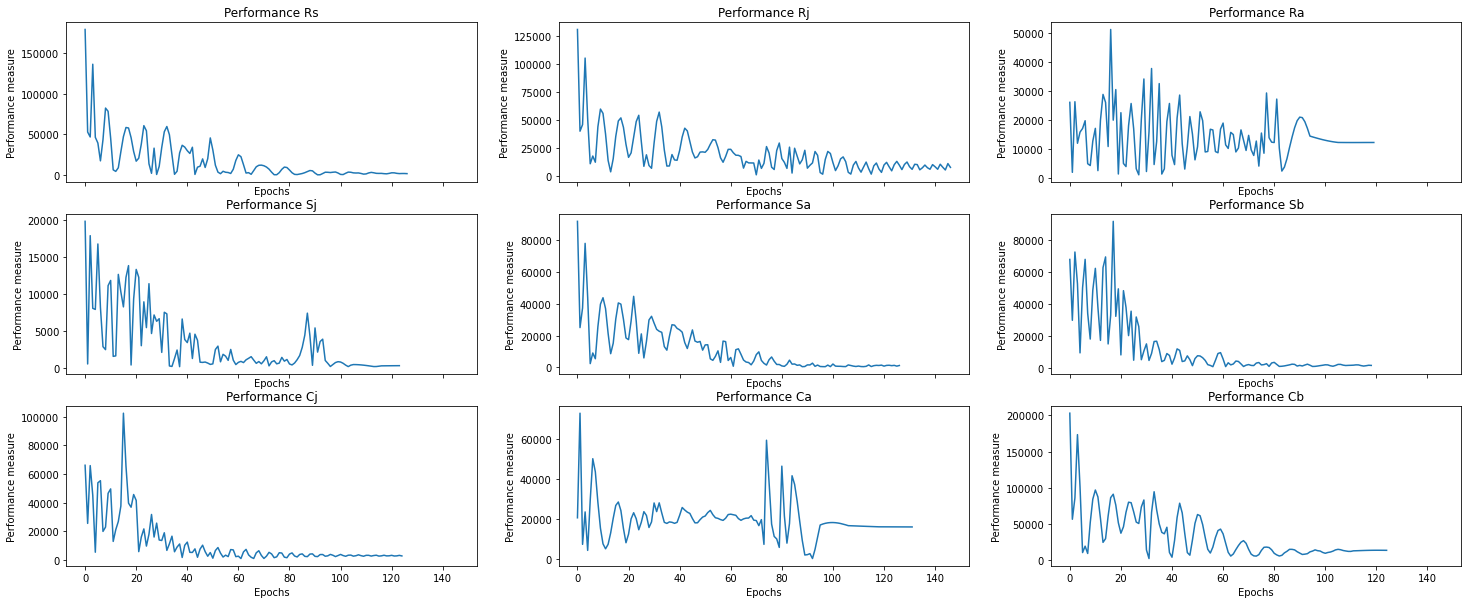

In [58]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF first equilibrium: second run (different seed)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_first_eq_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=1111, significance=0.95)

 Dataset:  EBT_first_eq_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.741566
Epoch: 100 [20%] 	Loss: 0.000068
Epoch   109: reducing learning rate of group 0 to 1.0000e-02.
Epoch   120: reducing learning rate of group 0 to 1.0000e-03.
INFO: Early stopping at epoch 100
Potential causes:  [3, 5, 0]
Validated causes:  []

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.729700
Epoch    23: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.001789
INFO: Early

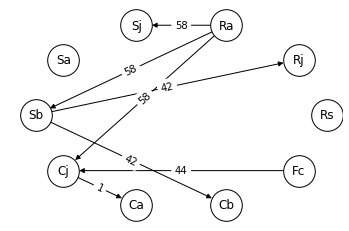

<Figure size 432x288 with 0 Axes>

In [59]:
%matplotlib inline

# Run TCDF with the selected equilibrium dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_first_eq_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 1111 --plot


Arguments: Namespace(cuda=False, data=['data/EBT_first_eq_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=1111, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.648462
Epoch    37: reducing learning rate of group 0 to 1.0000e-02.
Epoch    48: reducing learning rate of group 0 to 1.0000e-03.
Epoch    59: reducing learning rate of group 0 to 1.0000e-04.
Epoch    70: reducing learning rate of group 0 to 1.0000e-05.
Epoch    81: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 100 [20%] 	Loss: 0.004687
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.625375
Epoch: 100 [20%] 	Loss: 0.002875
Epoch   115: reducing le

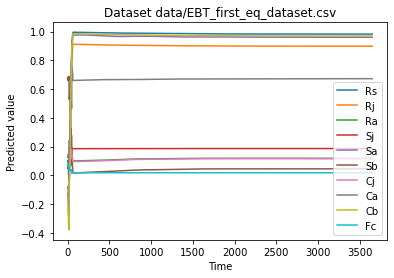

<Figure size 432x288 with 0 Axes>

In [60]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_first_eq_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 1111 --plot

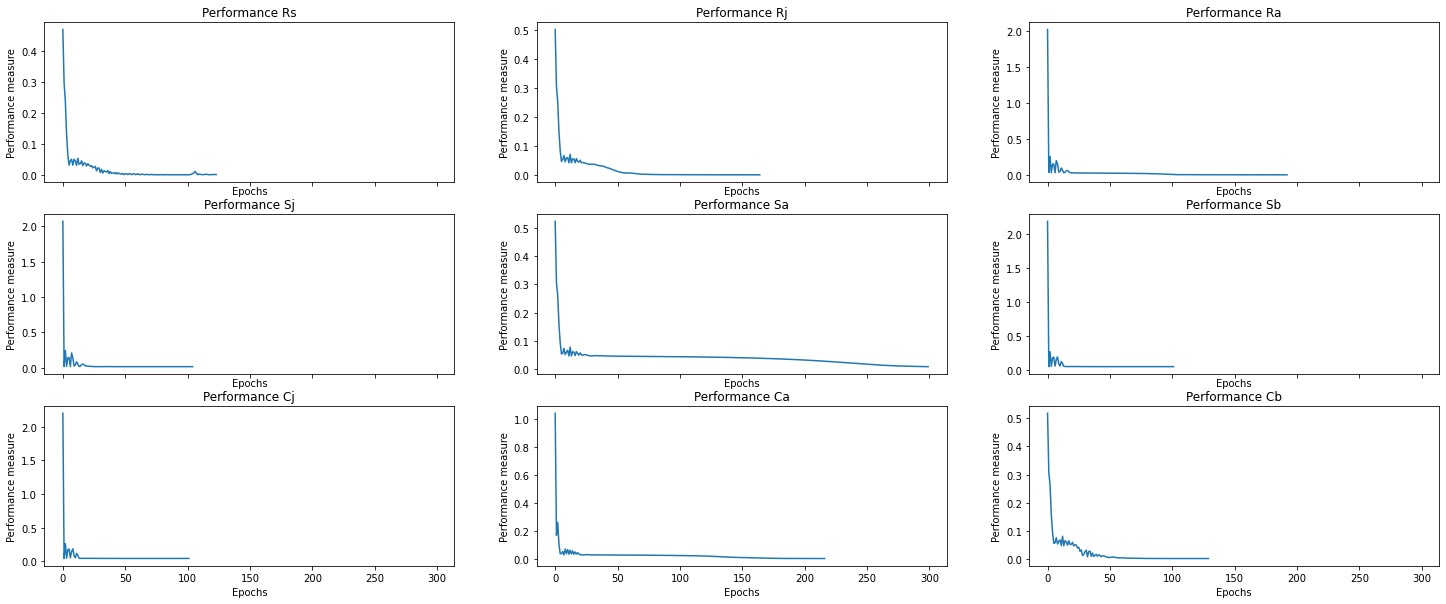

In [61]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

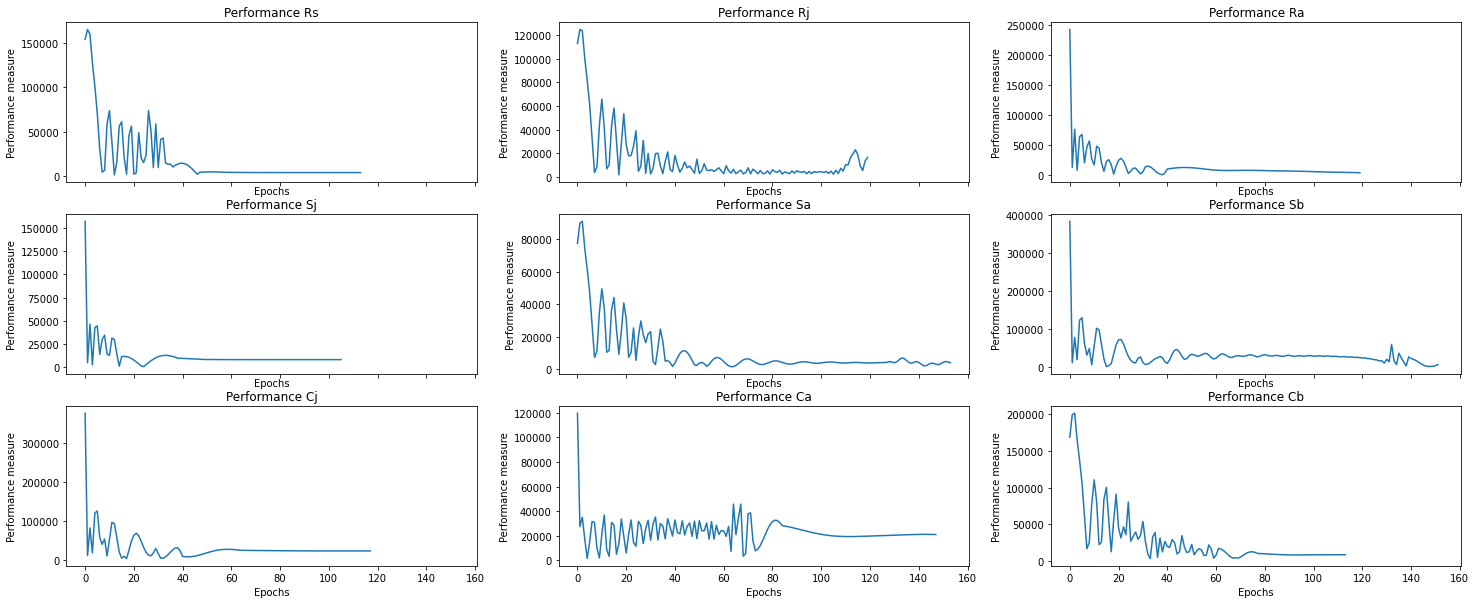

In [62]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF second equilibrium: first run 

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_second_eq_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=34321, significance=0.95)

 Dataset:  EBT_second_eq_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.778420
Epoch    34: reducing learning rate of group 0 to 1.0000e-02.
Epoch    45: reducing learning rate of group 0 to 1.0000e-03.
Epoch    56: reducing learning rate of group 0 to 1.0000e-04.
Epoch    67: reducing learning rate of group 0 to 1.0000e-05.
Epoch    78: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 100 [20%] 	Loss: 0.005479
INFO: Early stopping at epoch 100
Potential causes:  [3]
Validated causes:  []

 Analysis started for target:  Rj
INFO: Initializing learning rat

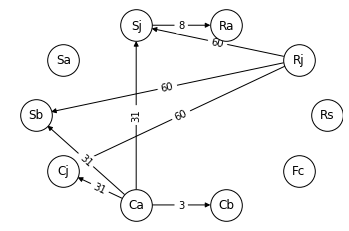

<Figure size 432x288 with 0 Axes>

In [63]:
%matplotlib inline

# Run TCDF with the selected equilibrium dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_second_eq_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 34321 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_second_eq_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=34321, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.672349
Epoch    43: reducing learning rate of group 0 to 1.0000e-02.
Epoch    76: reducing learning rate of group 0 to 1.0000e-03.
Epoch: 100 [20%] 	Loss: 0.001597
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.696007
Epoch    43: reducing learning rate of group 0 to 1.0000e-02.
Epoch    54: reducing learning rate of group 0 to 1.0000e-03.
Epoch    65: reducing learning rate of group 0 to 1.0000e-04.
Epoch    76: reducing learning rate of group 0 to 1.000

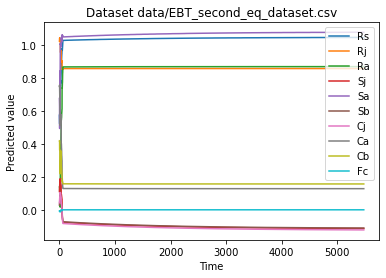

<Figure size 432x288 with 0 Axes>

In [64]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_second_eq_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 34321 --plot

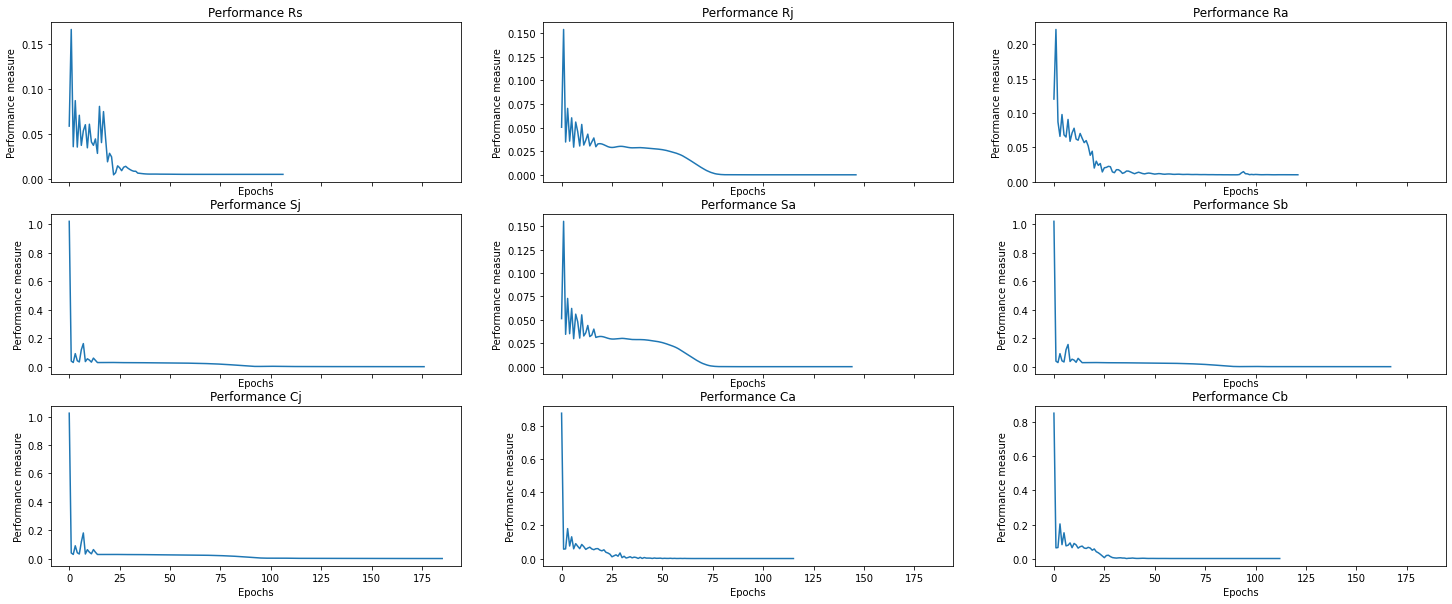

In [65]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

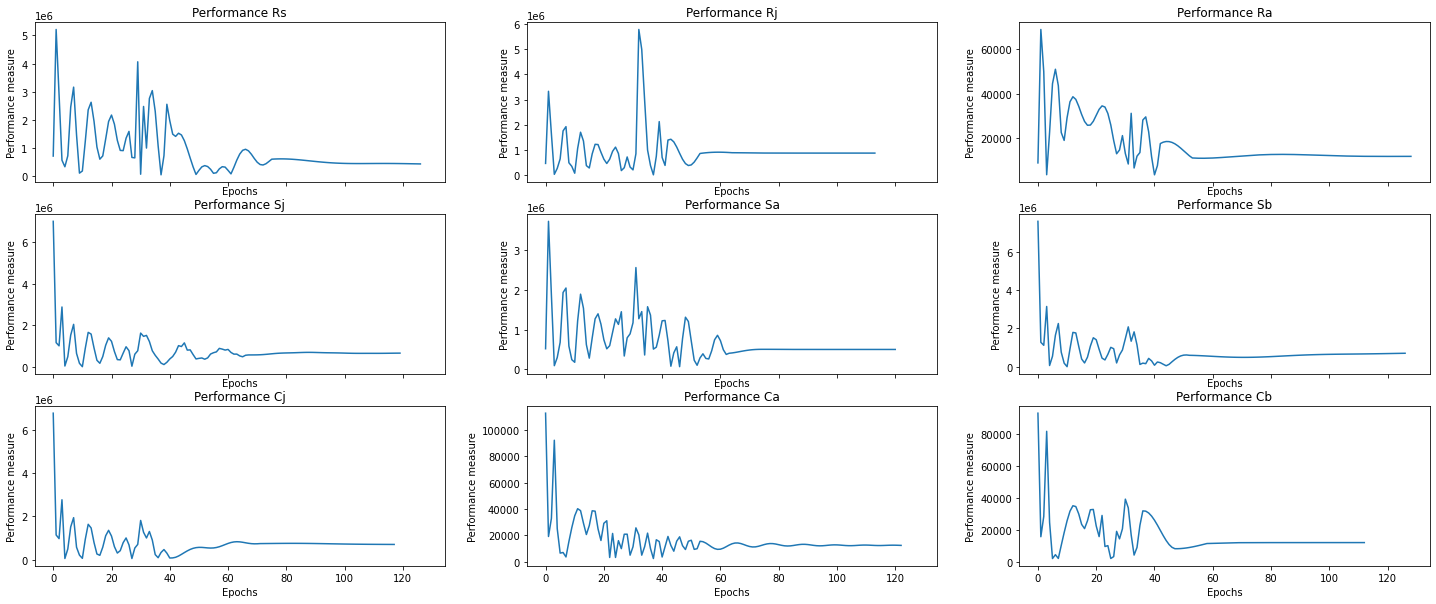

In [66]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

#### TCDF second equilibrium: second run (different seed)

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_second_eq_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=1238, significance=0.95)

 Dataset:  EBT_second_eq_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.286641
Epoch: 100 [20%] 	Loss: 0.000232
INFO: Early stopping at epoch 100
Potential causes:  [5]
Validated causes:  [5]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.291193
Epoch    28: reducing learning rate of group 0 to 1.0000e-02.
Epoch    39: reducing learning rate of group 0 to 1.0000e-03.
Epoch    50: reducing learning rate of group 0 to 1.0000e-04.
Epoch    61: reducing learning rate of group 0 

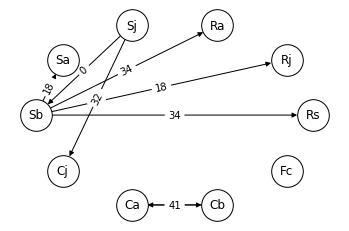

<Figure size 432x288 with 0 Axes>

In [67]:
%matplotlib inline

# Run TCDF with the selected equilibrium dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_second_eq_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 1238 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_second_eq_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=1238, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.237060
Epoch: 100 [20%] 	Loss: 0.000369
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.246258
Epoch    28: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.001472
INFO: Early stopping at epoch 100

 Analysis started for target:  Ra
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.128793
Epoch    32: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.001154

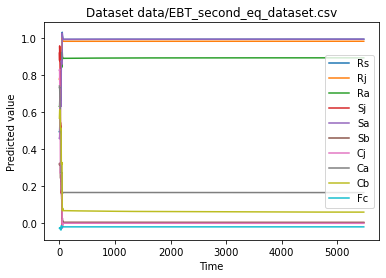

<Figure size 432x288 with 0 Axes>

In [68]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_second_eq_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 1238 --plot

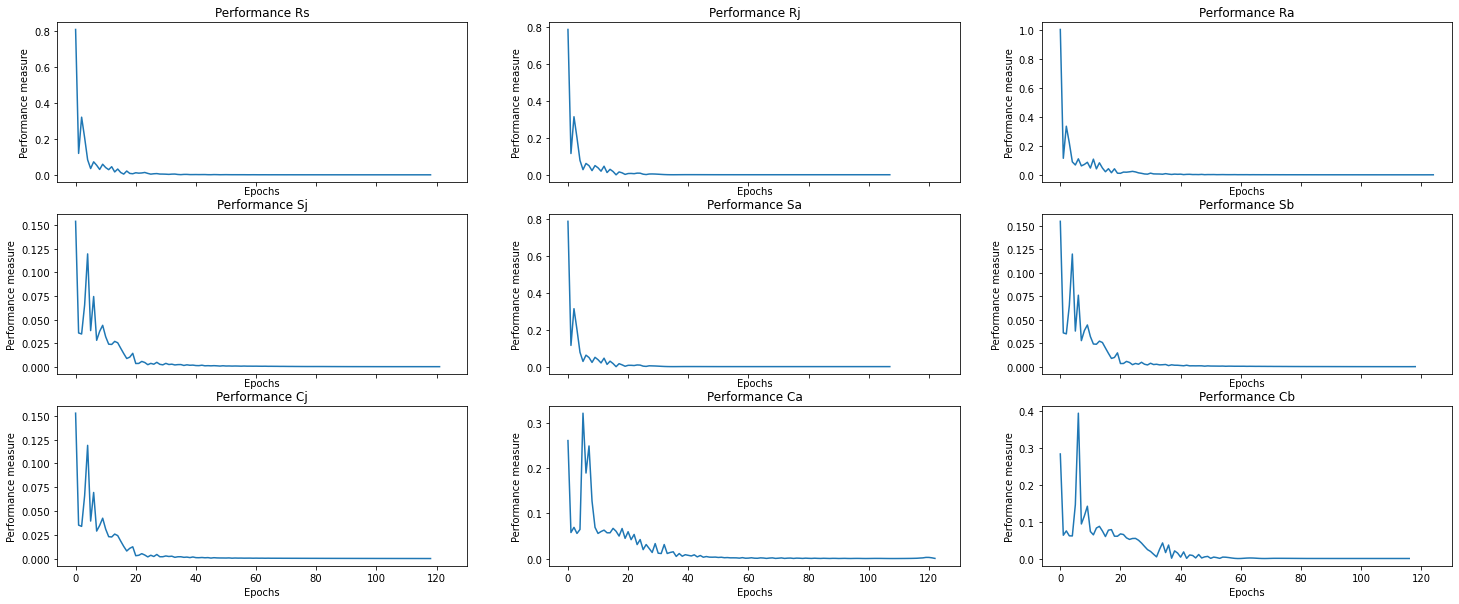

In [69]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

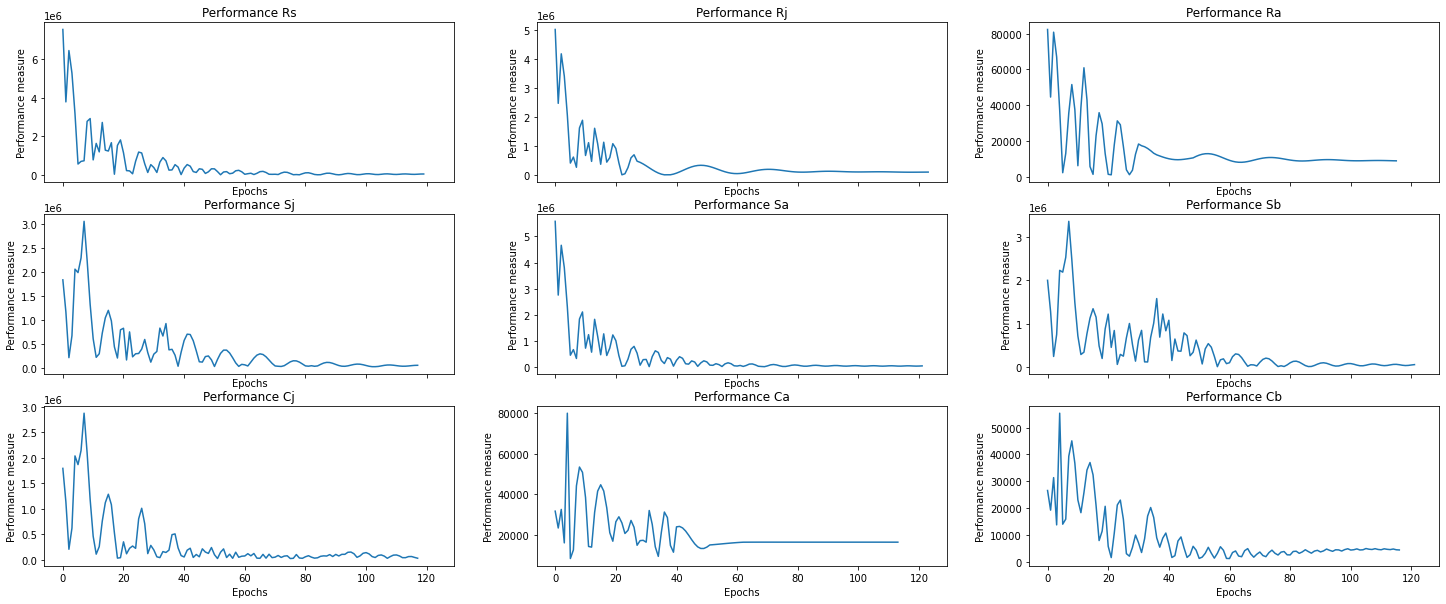

In [70]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)

### TCDF with EBT transient dynamics

This data represents the tritrophic biomasses during the introduced fishing pressure on cod. At 20 years Fc increases and is put to a halt on 40 years. Therefore I split the transient dynamics into two separate transient phases: 20-40 years (fishing pressure increases linearly) and 40-70 years (searching for a new equilibrium).

#### Data cleaning

In [71]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML

# Select information of datapoints for each transient state (i.e. between year 20 and 60 & 60 and 70)
first_trans_ebt = ebt[(ebt['Time (year)'] >= 20) & (ebt['Time (year)'] <= 60)]
second_trans_ebt = ebt[(ebt['Time (year)'] >= 60) & (ebt['Time (year)'] <= 70)]

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled_1 = scaler.fit_transform(first_trans_ebt[['Rs', 'Rj', 'Ra',
                                                  'Sj', 'Sa', 'Sb',
                                                  'Cj', 'Ca', 'Cb',
                                                  'Fc']])
ebt_scaled_2 = scaler.fit_transform(second_trans_ebt[['Rs', 'Rj', 'Ra',
                                                   'Sj', 'Sa', 'Sb',
                                                   'Cj', 'Ca', 'Cb',
                                                   'Fc']])

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
ebt_scaled_1 = pd.DataFrame(ebt_scaled_1, columns = labels)
ebt_scaled_2 = pd.DataFrame(ebt_scaled_2, columns = labels)

# Check the scaled DataFrame
display(ebt_scaled_1.head(-10))
display(ebt_scaled_2.head(-10))

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.033376,0.646078,0.242979,0.000029,0.000000e+00,0.849141,2.027708e-01,1.000000e+00,0.000000
1,1.000000,0.033376,0.646078,0.242979,0.000029,6.783751e-11,0.849141,2.027707e-01,9.999992e-01,0.000068
2,1.000000,0.033376,0.646078,0.242979,0.000029,8.316388e-10,0.849141,2.027705e-01,9.999967e-01,0.000137
3,1.000000,0.033376,0.646079,0.242979,0.000029,2.994905e-09,0.849141,2.027703e-01,9.999926e-01,0.000205
4,1.000000,0.033376,0.646079,0.242979,0.000029,7.253600e-09,0.849141,2.027699e-01,9.999869e-01,0.000274
...,...,...,...,...,...,...,...,...,...,...
14586,0.000199,0.990540,0.999999,0.005217,0.992639,2.539723e-01,0.004501,7.451691e-07,1.905467e-12,0.999110
14587,0.000185,0.991214,0.999999,0.004844,0.993164,2.532034e-01,0.004179,6.870500e-07,1.758313e-12,0.999178
14588,0.000170,0.991888,0.999999,0.004471,0.993689,2.524342e-01,0.003857,6.297251e-07,1.612938e-12,0.999247
14589,0.000156,0.992562,0.999999,0.004098,0.994215,2.516648e-01,0.003534,5.731792e-07,1.469318e-12,0.999315


,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.000000,0.999206,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
1,0.997404,0.000770,1.000000,0.998947,0.000796,0.999293,0.999491,0.033854,0.000299,0.0
2,0.994830,0.001473,0.997617,0.997888,0.001592,0.998585,0.998982,0.066969,0.000654,0.0
3,0.992291,0.002119,0.992454,0.996824,0.002387,0.997878,0.998472,0.099327,0.001063,0.0
4,0.989796,0.002715,0.984512,0.995753,0.003181,0.997170,0.997961,0.130918,0.001525,0.0
...,...,...,...,...,...,...,...,...,...,...
3636,0.005638,0.999563,0.942017,0.000308,0.999590,0.000440,0.000277,0.016949,0.522800,0.0
3637,0.005644,0.999595,0.942216,0.000286,0.999620,0.000408,0.000257,0.016854,0.522577,0.0
3638,0.005651,0.999626,0.942415,0.000264,0.999649,0.000376,0.000237,0.016758,0.522355,0.0
3639,0.005658,0.999658,0.942415,0.000242,0.999679,0.000345,0.000217,0.016663,0.522132,0.0


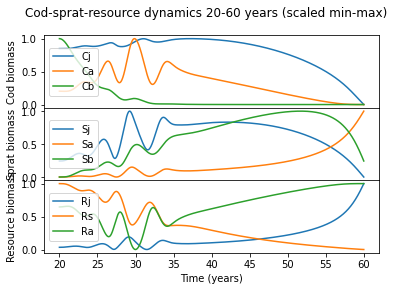

In [72]:
# Visualize scaled data first transient
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

visualise_scaled(ebt_scaled_1, [20,60])

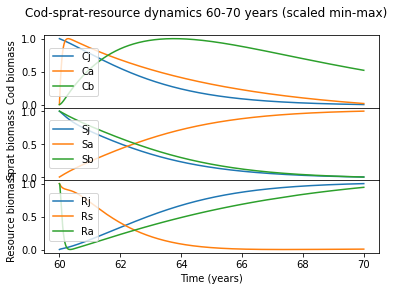

In [73]:
# Visualize scaled data second transient
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

visualise_scaled(ebt_scaled_2, [60,70])

In [74]:
# Create file path for new file
EBTScaled_path = os.path.join(TCDFdata_path, 'EBT_first_trans_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
ebt_scaled_1.to_csv(EBTScaled_path, index = False)

# Create file path for new file
EBTScaled_path = os.path.join(TCDFdata_path, 'EBT_second_trans_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
ebt_scaled_2.to_csv(EBTScaled_path, index = False)

#### TCDF first transient: first run 

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_first_trans_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=24310, significance=0.95)

 Dataset:  EBT_first_trans_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.175847
Epoch    36: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.011205
Epoch: 200 [40%] 	Loss: 0.005164
INFO: Early stopping at epoch 100
Potential causes:  [2, 7, 9]
Validated causes:  [9]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.045181
Epoch    38: reducing learning rate of group 0 to 1.0000e-02.
Epoch    49: reducing learning rate of group 0 to 1.0000e-03.
Epo

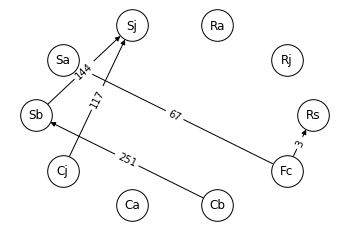

<Figure size 432x288 with 0 Axes>

In [75]:
%matplotlib inline

# Run TCDF with the selected equilibrium dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_first_trans_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 24310 --plot

Arguments: Namespace(cuda=False, data=['data/EBT_first_trans_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=3, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=24310, train_test_split=0.5)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.343798
Epoch    69: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.003507
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.001896
Epoch    12: reducing learning rate of group 0 to 1.0000e-02.
Epoch    33: reducing learning rate of group 0 to 1.0000e-03.
Epoch    44: reducing learning rate of group 0 to 1.0000e-04.
Epoch    55: reducing learning rate of group 0 to 1.0000e-05.
Epoch    66: reducing learning rate of group 0 to 1.0

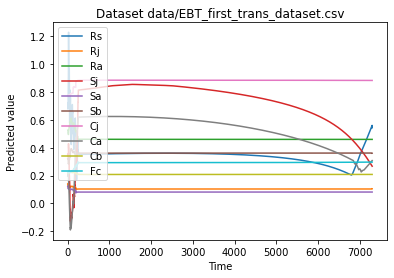

<Figure size 432x288 with 0 Axes>

In [76]:
# Run TCDF for predictive accuracy

%run -i "evaluate_predictions_TCDF.py" --data data/EBT_first_trans_dataset.csv --learning_rate 0.1 --hidden_layers 3 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 24310 --plot

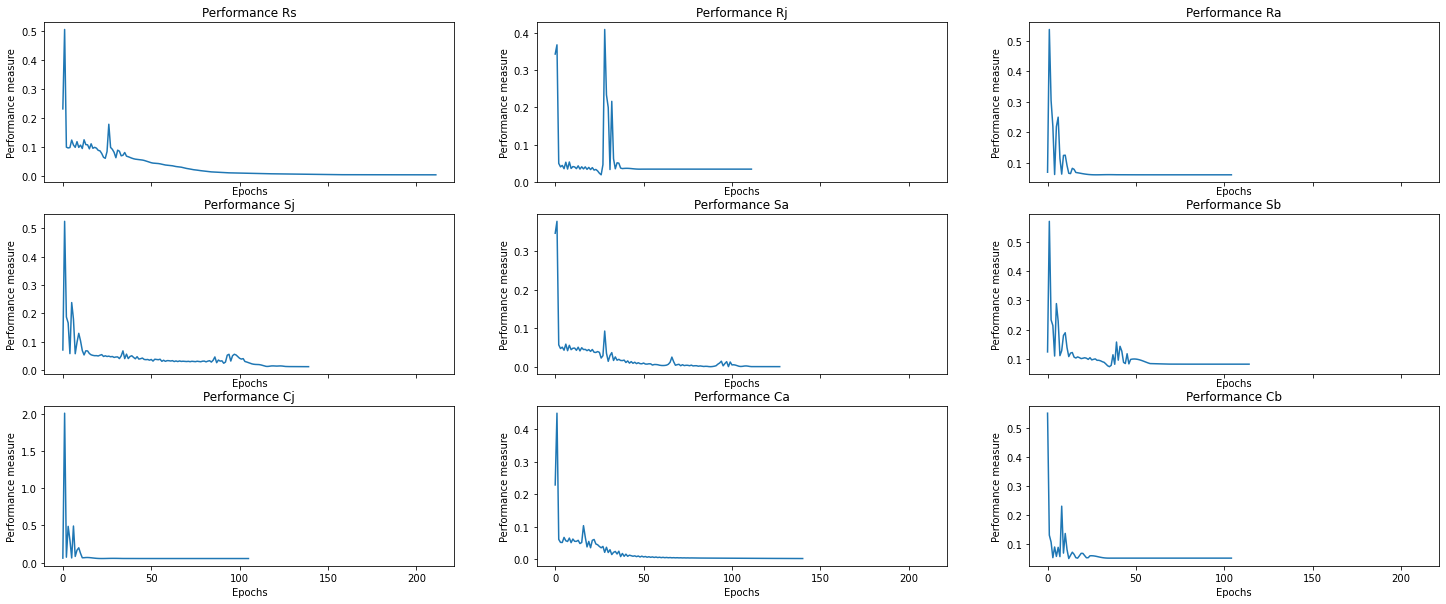

In [77]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot training losses
plot_performance(alllosses)

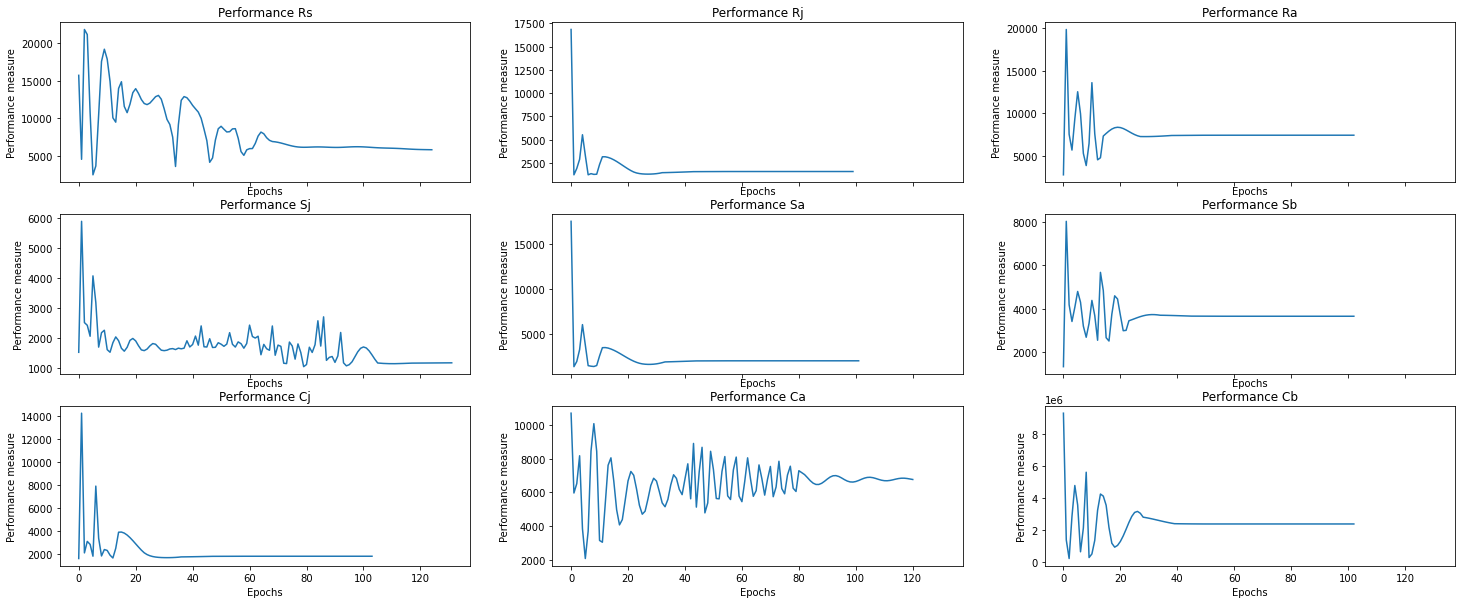

In [78]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot accuracy (MASE values)
plot_performance(accuracy)